https://medium.com/i̇stanbuldatascienceacademy/house-prices-prediction-using-regression-model-and-web-scraping-8791199635b6

In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import sys

In [2]:
def getAndParseURL(url):
    result = requests.get(url,headers={"User-Agent":"Opera/94.0.0.0"})  #     Mozilla/5.0
    soup = bts(result.text, 'html.parser')
    return soup

In [3]:
PAGE_NUM = []
def find_page_num():

    html = getAndParseURL("https://www.zingat.com/ankara-satilik-konut?sort=price.asc")
    for i in range(1,43):
        PAGE_NUM.append("https://www.zingat.com/ankara-satilik-konut?sort=price.asc" + "?page=" + str(i))
    return PAGE_NUM
find_page_num()

['https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=1',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=2',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=3',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=4',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=5',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=6',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=7',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=8',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=9',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=10',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=11',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=12',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=13',
 'https://www.zingat.com/ankara-satilik-konut?sort=price.asc?page=14',
 'https://www.z

In [4]:
ALL_PRODUCT = []
def all_product():
    for i in PAGE_NUM[::]:
        html = getAndParseURL(i)
        for result in html.findAll("a",{"class":"zl-card-inner"}):
            ALL_PRODUCT.append("https://www.zingat.com" + result.get("href"))
    return ALL_PRODUCT
all_product()

['https://www.zingat.com/sincan-dunyagoz-hastanesi-yakini-satilik-3-1-on-cephe-daire-4627008i',
 'https://www.zingat.com/sitede-ara-katta-3-1-ebeveyn-banyo-kiler-3-balkon-4627258i',
 'https://www.zingat.com/sincan-maresal-cakmak-mah-de-on-cephe-satilik-2-1-daire-4626997i',
 'https://www.zingat.com/sincan-aksemsettin-mah-de-on-cephe-satilik-2-1-daire-4627002i',
 'https://www.zingat.com/sincan-ataturk-mah-de-on-cephe-satilik-3-1-daire-4627006i',
 'https://www.zingat.com/etimesgut-yapracik-toki-y-tipi-3-1-satilik-daire-4627318i',
 'https://www.zingat.com/sincan-plevne-mah-de-2-1-salon-bagimsiz-satilik-yuksek-giris-4626992i',
 'https://www.zingat.com/site-icerisinde-cift-banyo-cift-balkon-kilerli-satilik-daire-4626611i',
 'https://www.zingat.com/eryaman-goksu-park-konutlari-gb-4-kat-4579824i',
 'https://www.zingat.com/mutlu-mh-2-katta-3-1-satilik-daire-4625446i',
 'https://www.zingat.com/ferahevler-sitesinde-guney-dogu-cph-sehir-manzarali-full-yapili-4623493i',
 'https://www.zingat.com/zir

In [15]:
RESULT = []
for rslt in ALL_PRODUCT[:]:

    html = getAndParseURL(rslt)
    house_description = html.find("div", {"class":"col-xs-12"}).h1.text
    #neighborhood = html.find("div", {"class":"detail-location-path"}).h2.text.replace("Kadıköy\n","").replace("İstanbul","").replace(",","").strip()
    price = html.find("div", {"class":"col-md-3 price-info-text"}).find("strong",{"itemprop":"price"}).text.replace("TL","").strip()
    net_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[1].find("span").text.replace("m²","").strip()
    gross_m2 = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[2].find("span").text.replace("m²","").strip()
    room_livingroom = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()
    room = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[0]
    living_room = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[3].find("span").text.strip()[2]
    bathroom = html.find("ul", {"class":"row attribute-detail-list"}).findAll("li",{"class":"col-md-6"})[4].find("span").text.strip()
    photo = html.find("div", {"class":"detail-images-slide-container hidden-xs hidden-sm"}).a.span.text.replace("+","")
    
    RESULT.append([house_description,price,net_m2,gross_m2,room_livingroom,room,living_room,bathroom,photo]) # neighborhood,
    
columns = ["İLAN ADI","SEMT", "FİYAT","NET(m²)","BRÜT(m²)","ODA-SALON SAYISI","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI"]
df = pd.DataFrame.from_records(RESULT, columns=columns)

ValueError: 10 columns passed, passed data had 9 columns

In [11]:
df.to_csv("ZingatAnkaraHousePricePrediction.csv") 

In [12]:
df.head()

,İLAN ADI,SEMT,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
0,SİNCAN DÜNYAGÖZ HASTANESİ YAKINI SATILIK 3+1 Ö...,Çiğdemtepe Yenimahalle\n ...,689.000,105,110,3+1,3,3+1,1,25
1,SİTE'DE ARA KATTA (3+1)-EBEVEYN BANYO+KİLER+3 ...,Çiğdemtepe Yenimahalle\n ...,1.049.000,135,145,3+1,3,3+1,2,16
2,SİNCAN MAREŞAL ÇAKMAK MAH.'DE ÖN CEPHE SATILIK...,Çiğdemtepe Yenimahalle\n ...,619.000,88,98,2+1,2,2+1,1,17
3,SİNCAN AKŞEMSETTİN MAH.'DE ÖN CEPHE SATILIK 2+...,Çiğdemtepe Yenimahalle\n ...,649.000,85,95,2+1,2,2+1,1,16
4,SİNCAN ATATÜRK MAH.'DE ÖN CEPHE SATILIK 3+1 DAİRE,Çiğdemtepe Yenimahalle\n ...,675.000,100,105,3+1,3,3+1,1,14


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          882 non-null    object
 1   SEMT              882 non-null    object
 2   FİYAT             882 non-null    object
 3   NET(m²)           882 non-null    object
 4   BRÜT(m²)          882 non-null    object
 5   ODA-SALON SAYISI  882 non-null    object
 6   ODA SAYISI        882 non-null    object
 7   SALON SAYISI      882 non-null    object
 8   BANYO SAYISI      882 non-null    object
 9   FOTOĞRAF SAYISI   882 non-null    object
dtypes: object(10)
memory usage: 69.0+ KB


In [99]:
df.isnull().sum()

İLAN ADI            0
SEMT                0
FİYAT               0
NET(m²)             0
BRÜT(m²)            0
ODA-SALON SAYISI    0
ODA SAYISI          0
SALON SAYISI        0
BANYO SAYISI        0
FOTOĞRAF SAYISI     0
dtype: int64

In [101]:
df.SEMT.unique()

array(['Karakaya Keçiören\n                                                 Ankara',
       'Göksu Etimesgut\n                                                 Ankara',
       'Mutlu Mamak\n                                                 Ankara',
       'Yayla Keçiören\n                                                 Ankara',
       'Yeni Batı Yenimahalle\n                                                 Ankara',
       'Feridun Çelik Altındağ\n                                                 Ankara',
       'Bağcılar Çankaya\n                                                 Ankara',
       'Alacaatlı Çankaya\n                                                 Ankara',
       '30 Ağustos Etimesgut\n                                                 Ankara',
       'Ballıkpınar Gölbaşı\n                                                 Ankara',
       'Çiğdemtepe Yenimahalle\n                                                 Ankara',
       'Etlik Keçiören\n                                  

In [102]:
df["ODA SAYISI"].value_counts(dropna = False)

3    462
4    126
5     84
6     84
2     84
1     42
Name: ODA SAYISI, dtype: int64

In [103]:
df["ODA SAYISI"] = df["ODA SAYISI"].astype(int)

In [104]:
df["SALON SAYISI"].value_counts(dropna = False)

3+1    462
4+1    126
5+1     84
2+1     84
6+1     42
1+1     42
6+2     42
Name: SALON SAYISI, dtype: int64

In [105]:
df['SALON SAYISI'] = df['SALON SAYISI'].str.extract(r'(\d+)\s+(\d+)')[1]

In [ ]:
df["SALON SAYISI"] = df["SALON SAYISI"].astype(int)

ValueError: cannot convert float NaN to integer

In [107]:
df["BANYO SAYISI"].value_counts(dropna = False)

2    588
1    252
3     42
Name: BANYO SAYISI, dtype: int64

In [108]:
df["BANYO SAYISI"] = df["BANYO SAYISI"].astype(int)

In [109]:
df["FOTOĞRAF SAYISI"].value_counts(dropna = False)

26    126
19     84
36     84
32     84
13     42
27     42
35     42
31     42
15     42
22     42
8      42
24     42
25     42
20     42
30     42
29     42
Name: FOTOĞRAF SAYISI, dtype: int64

In [110]:
df["FOTOĞRAF SAYISI"] = df["FOTOĞRAF SAYISI"].astype(int)

In [112]:
df["FİYAT"].value_counts(dropna = False)

4.500.000     84
988.000       42
1.290.000     42
14.250.000    42
950.000       42
1.100.000     42
2.250.000     42
1.799.000     42
1.200.000     42
1.265.000     42
850.000       42
1.650.000     42
3.900.000     42
9.000.000     42
1.250.000     42
3.800.000     42
1.790.000     42
1.450.000     42
3.280.000     42
1.199.000     42
Name: FİYAT, dtype: int64

In [113]:
df["FİYAT"]= df["FİYAT"].apply(lambda x : str(x).replace(".", "")).astype(int)

In [114]:
df["NET(m²)"].value_counts(dropna=False)

120    126
140    126
135     84
125     84
155     42
110     42
130     42
175     42
447     42
106     42
95      42
240     42
55      42
400     42
150     42
Name: NET(m²), dtype: int64

In [115]:
df["NET(m²)"] = df["NET(m²)"].astype(int)

In [116]:
df["BRÜT(m²)"].value_counts(dropna=False)

145    168
135    168
130     84
180     42
125     42
200     42
520     42
110     42
100     42
270     42
165     42
60      42
550     42
160     42
Name: BRÜT(m²), dtype: int64

In [117]:
df["BRÜT(m²)"] = df["BRÜT(m²)"].astype(int)

In [118]:
df["ODA SAYISI"].value_counts(dropna=False)

3    462
4    126
5     84
6     84
2     84
1     42
Name: ODA SAYISI, dtype: int64

In [119]:



df["ODA SAYISI"] = df["ODA SAYISI"].astype(int)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   İLAN ADI          882 non-null    object
 1   SEMT              882 non-null    object
 2   FİYAT             882 non-null    int32 
 3   NET(m²)           882 non-null    int32 
 4   BRÜT(m²)          882 non-null    int32 
 5   ODA-SALON SAYISI  882 non-null    object
 6   ODA SAYISI        882 non-null    int32 
 7   SALON SAYISI      0 non-null      object
 8   BANYO SAYISI      882 non-null    int32 
 9   FOTOĞRAF SAYISI   882 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 48.4+ KB


In [123]:
mask = (df["FİYAT"] > 5000000)
df[mask].head()

,İLAN ADI,SEMT,FİYAT,NET(m²),BRÜT(m²),ODA-SALON SAYISI,ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI
7,GAZİOSMANPAŞA PYLON REZİDANS DA PENTHOUSE DAİRE,Bağcılar Çankaya\n ...,9000000,447,520,6+1,6,NaN,3,36
18,ÇANKAYA BEYSUKENT ANGORA BULVARI FULL YAPILI K...,Mutlukent Çankaya\n ...,14250000,400,550,6+2,6,NaN,2,26
28,GAZİOSMANPAŞA PYLON REZİDANS DA PENTHOUSE DAİRE,Bağcılar Çankaya\n ...,9000000,447,520,6+1,6,NaN,3,36
39,ÇANKAYA BEYSUKENT ANGORA BULVARI FULL YAPILI K...,Mutlukent Çankaya\n ...,14250000,400,550,6+2,6,NaN,2,26
49,GAZİOSMANPAŞA PYLON REZİDANS DA PENTHOUSE DAİRE,Bağcılar Çankaya\n ...,9000000,447,520,6+1,6,NaN,3,36


In [126]:
new_df = pd.get_dummies(df, columns= ["SEMT"])
new_df.drop(columns="ODA-SALON SAYISI", inplace= True)
new_df.drop(columns= "İLAN ADI")

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,SEMT_30 Ağustos Etimesgut\n Ankara,SEMT_Alacaatlı Çankaya\n Ankara,SEMT_Ballıkpınar Gölbaşı\n Ankara,...,SEMT_Feridun Çelik Altındağ\n Ankara,SEMT_Göksu Etimesgut\n Ankara,SEMT_Karakaya Keçiören\n Ankara,SEMT_Mutlu Mamak\n Ankara,SEMT_Mutlukent Çankaya\n Ankara,SEMT_Ufuktepe Keçiören\n Ankara,SEMT_Yayla Keçiören\n Ankara,SEMT_Yeni Batı Yenimahalle\n Ankara,SEMT_Çiğdemtepe Yenimahalle\n Ankara,SEMT_Şehit Osman Avcı Etimesgut\n Ankara
0,988000,135,145,3,NaN,2,19,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1290000,125,135,3,NaN,1,13,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3280000,155,180,4,NaN,2,36,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1450000,110,125,3,NaN,1,27,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1790000,130,135,3,NaN,1,19,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,1100000,55,60,1,NaN,1,26,0,0,0,...,0,0,0,0,0,0,0,0,0,1
878,950000,120,130,3,NaN,2,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
879,14250000,400,550,6,NaN,2,26,0,0,0,...,0,0,0,0,1,0,0,0,0,0
880,1199000,140,145,3,NaN,1,29,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
new_df.sort_values("FİYAT").head()

,İLAN ADI,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,SALON SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,SEMT_30 Ağustos Etimesgut\n Ankara,SEMT_Alacaatlı Çankaya\n Ankara,...,SEMT_Feridun Çelik Altındağ\n Ankara,SEMT_Göksu Etimesgut\n Ankara,SEMT_Karakaya Keçiören\n Ankara,SEMT_Mutlu Mamak\n Ankara,SEMT_Mutlukent Çankaya\n Ankara,SEMT_Ufuktepe Keçiören\n Ankara,SEMT_Yayla Keçiören\n Ankara,SEMT_Yeni Batı Yenimahalle\n Ankara,SEMT_Çiğdemtepe Yenimahalle\n Ankara,SEMT_Şehit Osman Avcı Etimesgut\n Ankara
766,''UZMANLAR G.Y.D.''30 AĞUSTOS MAH.DE MERKEZİ K...,850000,95,100,2,NaN,1,32,1,0,...,0,0,0,0,0,0,0,0,0,0
829,''UZMANLAR G.Y.D.''30 AĞUSTOS MAH.DE MERKEZİ K...,850000,95,100,2,NaN,1,32,1,0,...,0,0,0,0,0,0,0,0,0,0
115,''UZMANLAR G.Y.D.''30 AĞUSTOS MAH.DE MERKEZİ K...,850000,95,100,2,NaN,1,32,1,0,...,0,0,0,0,0,0,0,0,0,0
556,''UZMANLAR G.Y.D.''30 AĞUSTOS MAH.DE MERKEZİ K...,850000,95,100,2,NaN,1,32,1,0,...,0,0,0,0,0,0,0,0,0,0
325,''UZMANLAR G.Y.D.''30 AĞUSTOS MAH.DE MERKEZİ K...,850000,95,100,2,NaN,1,32,1,0,...,0,0,0,0,0,0,0,0,0,0


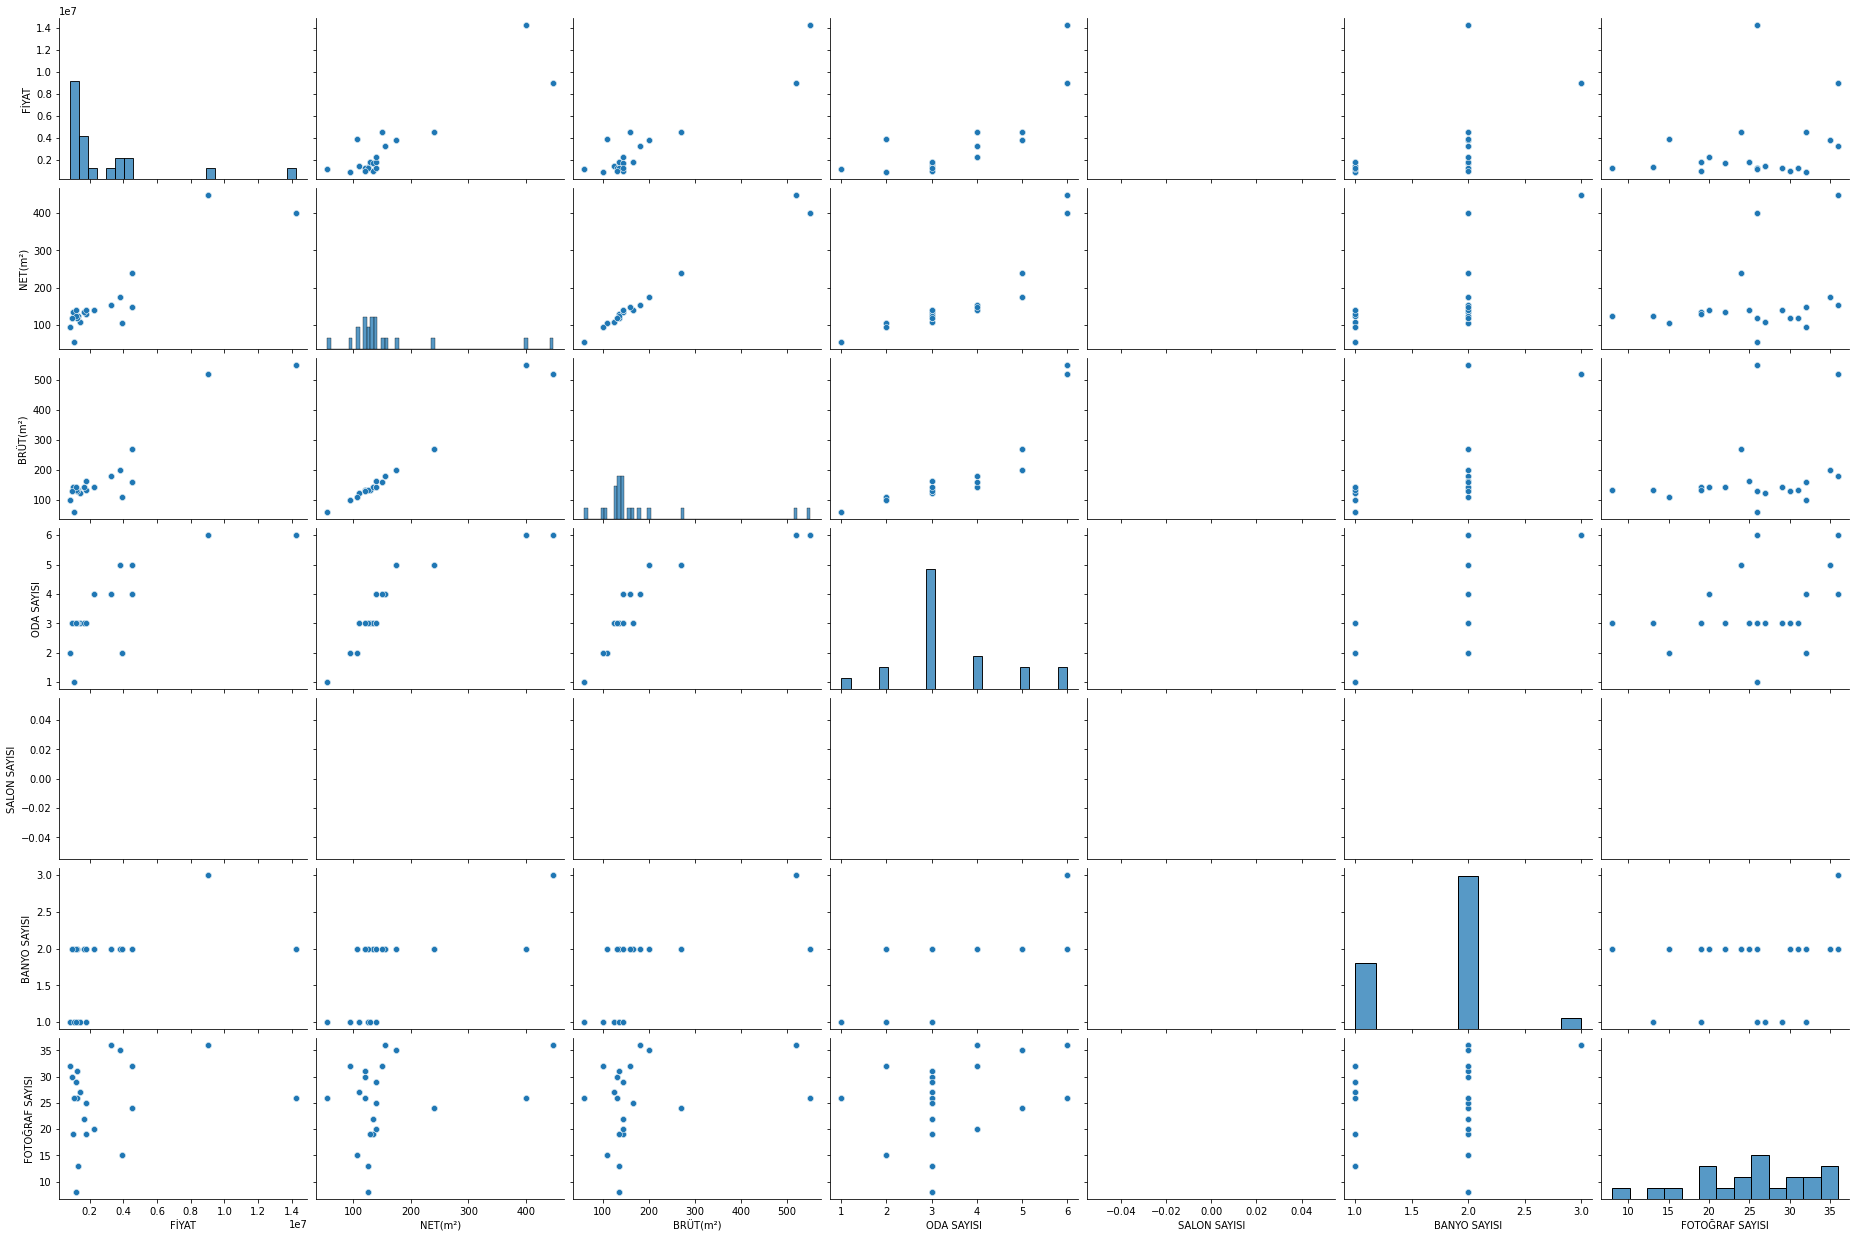

In [128]:
sns.pairplot(df, aspect= 1.5)

<AxesSubplot:title={'center':'EV FİYATLARININ DAĞILIMI'}, xlabel='FİYAT', ylabel='Count'>

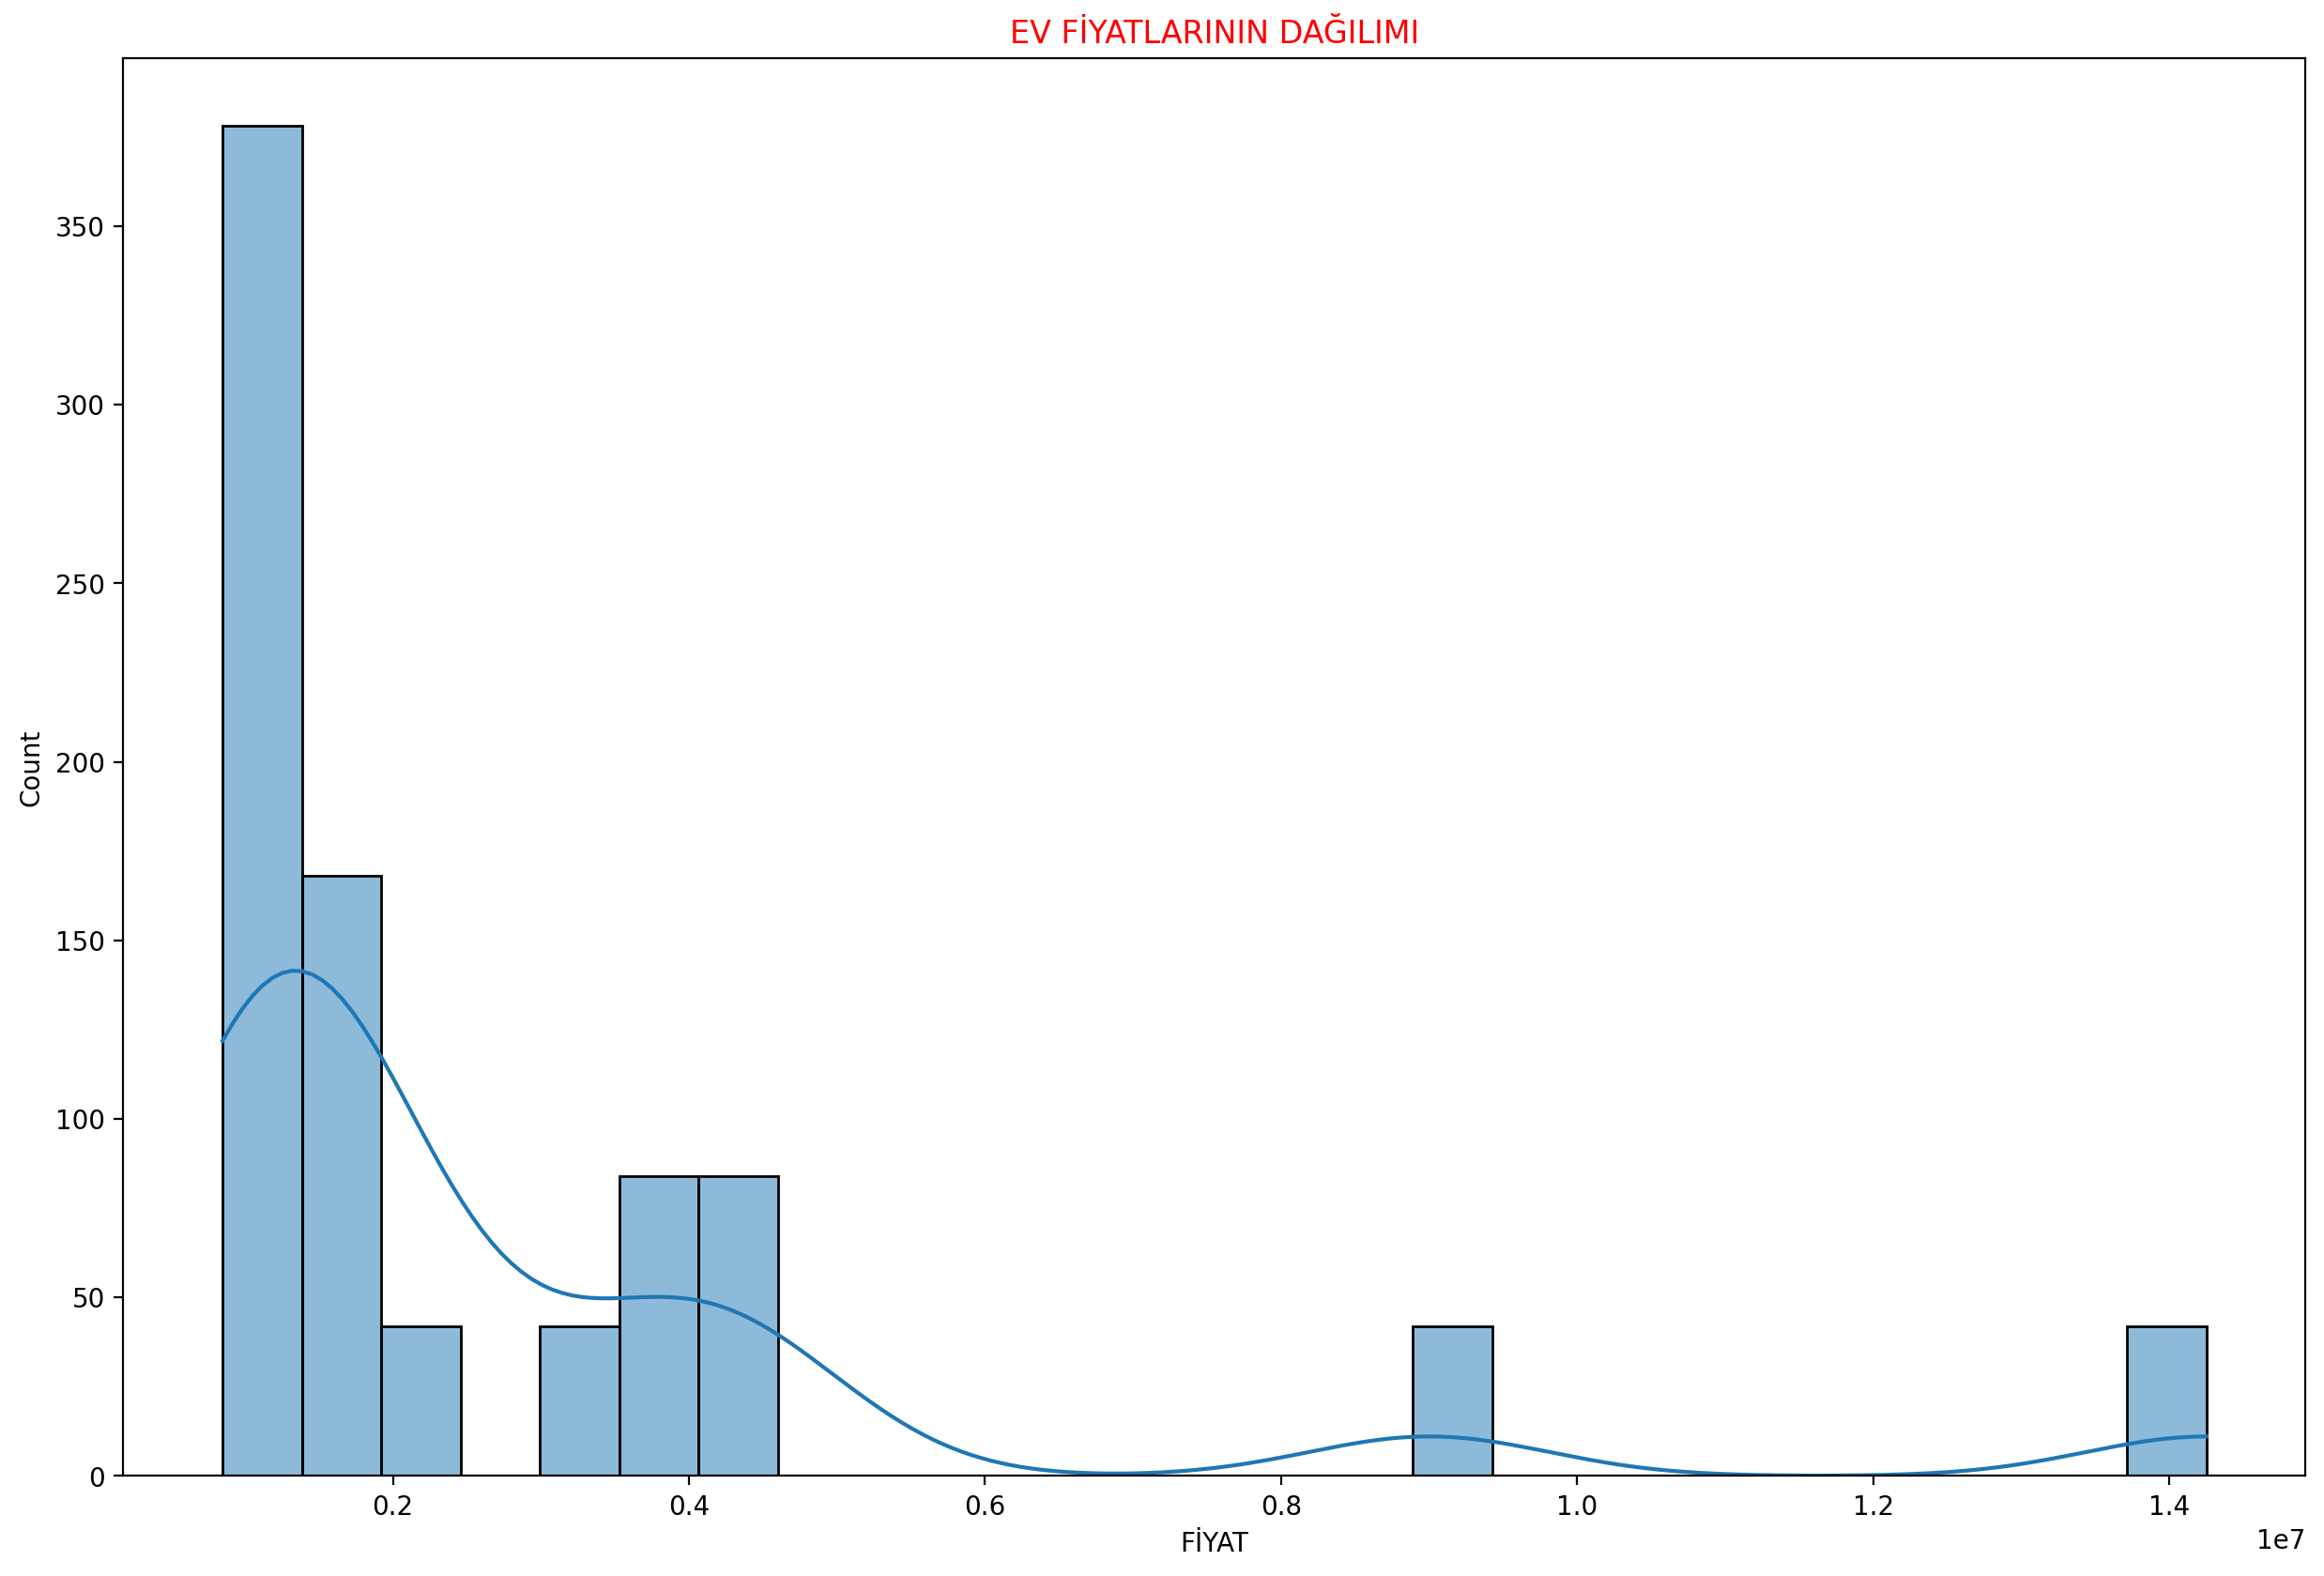

In [129]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV FİYATLARININ DAĞILIMI", c="red")
sns.histplot(data=new_df, x="FİYAT", kde=True)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/08_HousePriceDistributioninKadıköy.png', dpi=200)

In [130]:
house_price_neighbourhood = df.groupby("SEMT").mean().sort_values("FİYAT", ascending = False).reset_index().iloc[:,:2]
house_price_neighbourhood

,SEMT,FİYAT
0,Mutlukent Çankaya\n ...,14250000.0
1,Bağcılar Çankaya\n ...,9000000.0
2,Ballıkpınar Gölbaşı\n ...,4500000.0
3,Bağlıca Etimesgut\n ...,4500000.0
4,Alacaatlı Çankaya\n ...,3900000.0
5,Yeni Batı Yenimahalle\n ...,3800000.0
6,Göksu Etimesgut\n ...,3280000.0
7,Etlik Keçiören\n ...,2250000.0
8,Çiğdemtepe Yenimahalle\n ...,1799000.0
9,Yayla Keçiören\n ...,1790000.0


<AxesSubplot:title={'center':'ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE'}, xlabel='SEMT', ylabel='FİYAT'>

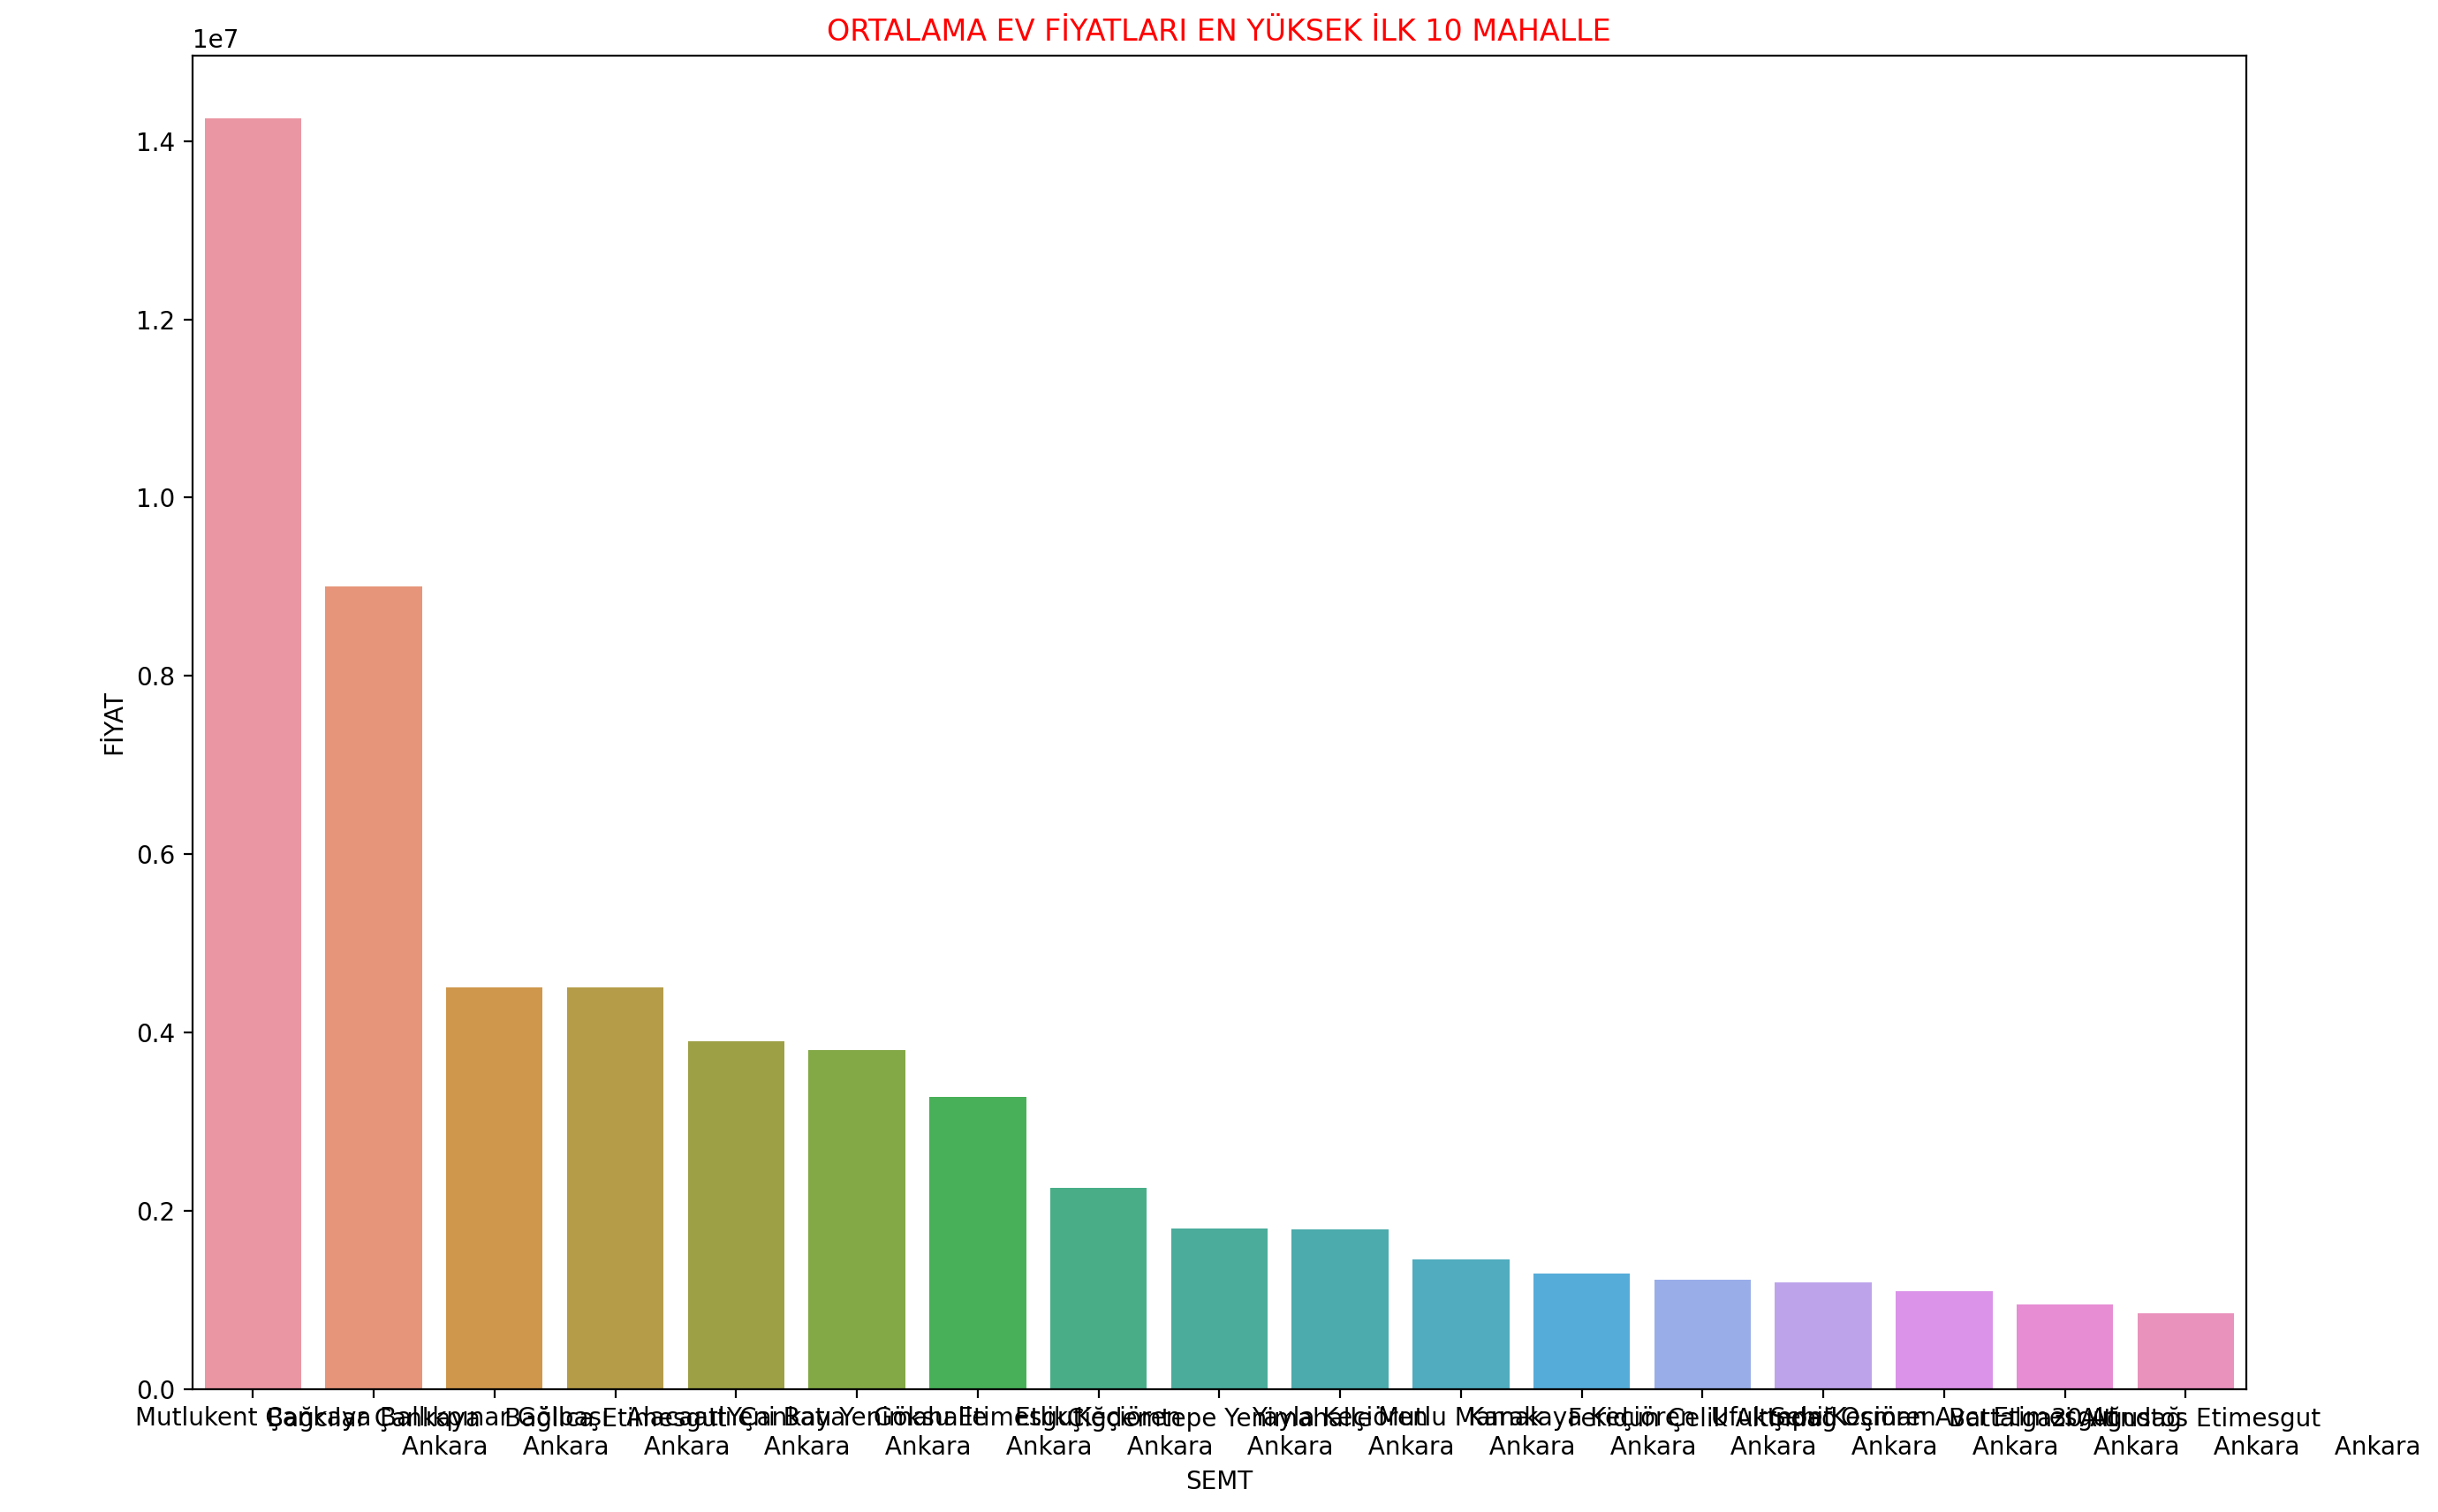

In [131]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ORTALAMA EV FİYATLARI EN YÜKSEK İLK 10 MAHALLE", c="red")
sns.barplot(x = 'SEMT', y = 'FİYAT', data = house_price_neighbourhood)

In [132]:
oda_salon = df.groupby("ODA-SALON SAYISI").count().reset_index().iloc[:,:2]
oda_salon

,ODA-SALON SAYISI,İLAN ADI
0,1+1,42
1,2+1,84
2,3+1,462
3,4+1,126
4,5+1,84
5,6+1,42
6,6+2,42


Text(0, 0.5, 'İLAN SAYISI')

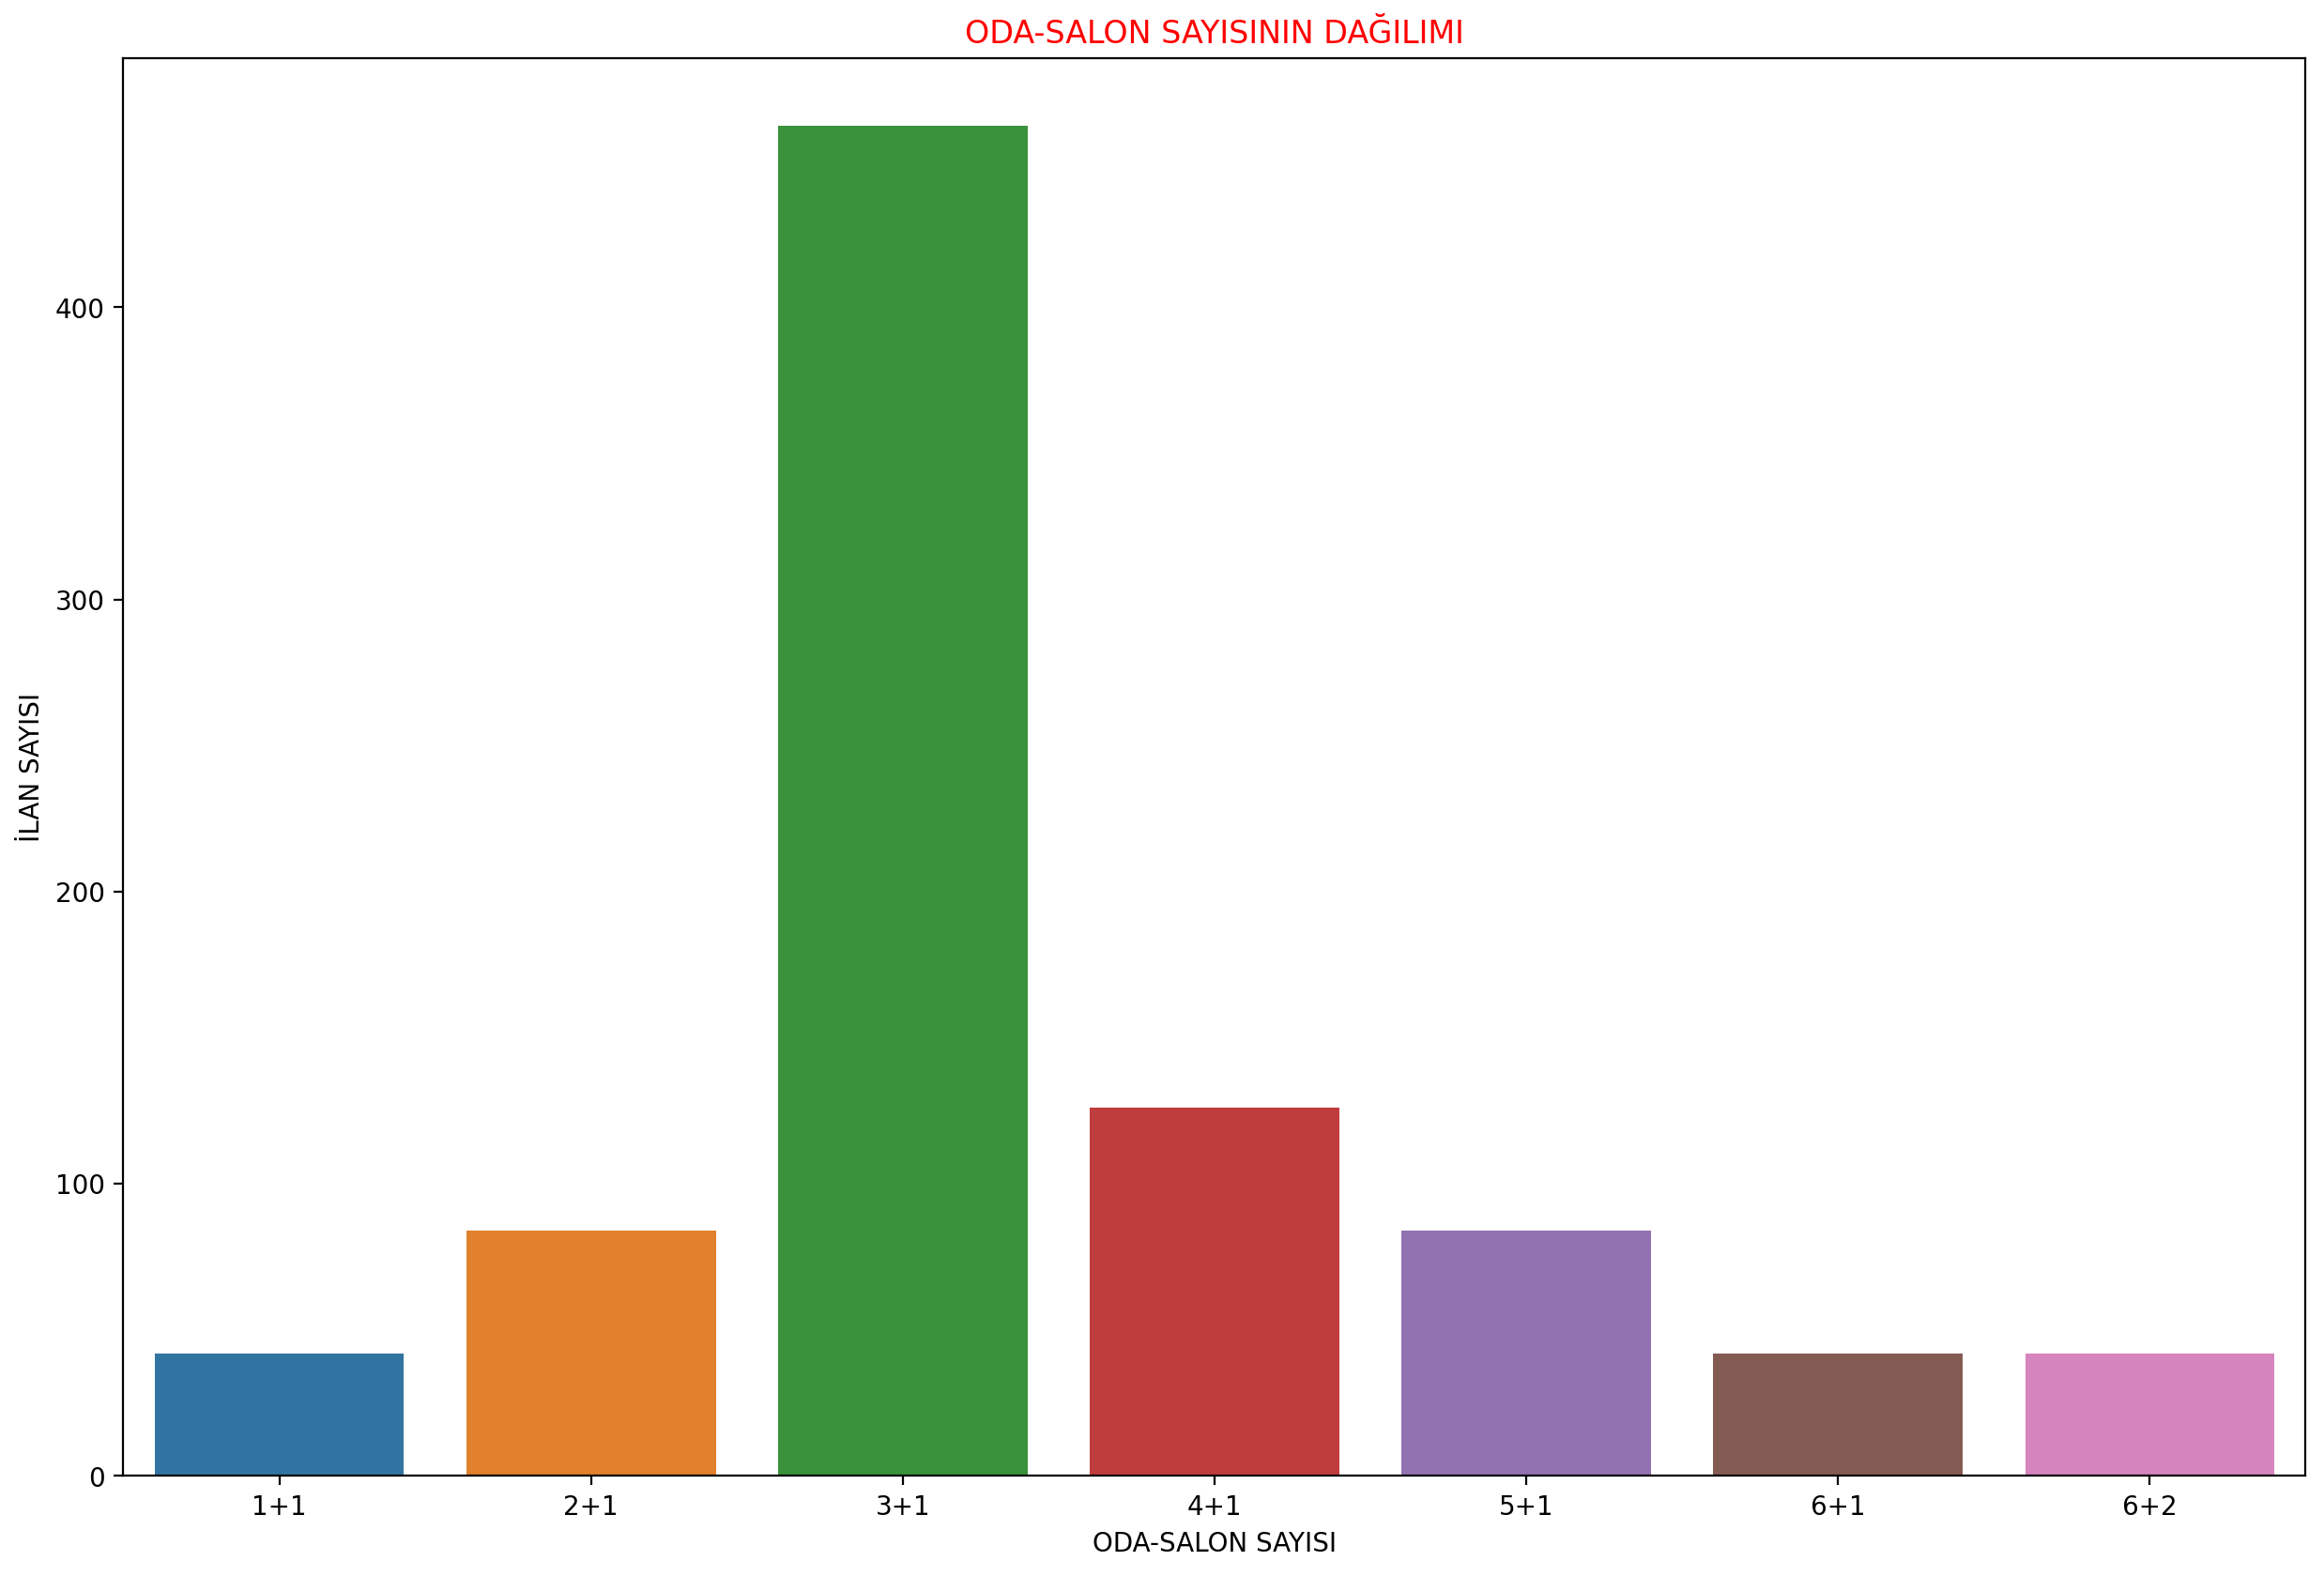

In [133]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ODA-SALON SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'ODA-SALON SAYISI', y = 'İLAN ADI', data = oda_salon)
plt.ylabel("İLAN SAYISI")
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project2/02_DistributionofNumberofRoom.png', dpi=200)

In [134]:
banyo = df.groupby("BANYO SAYISI").count().iloc[:,0:1].reset_index()
banyo

,BANYO SAYISI,İLAN ADI
0,1,252
1,2,588
2,3,42


Text(0, 0.5, 'İLAN SAYISI')

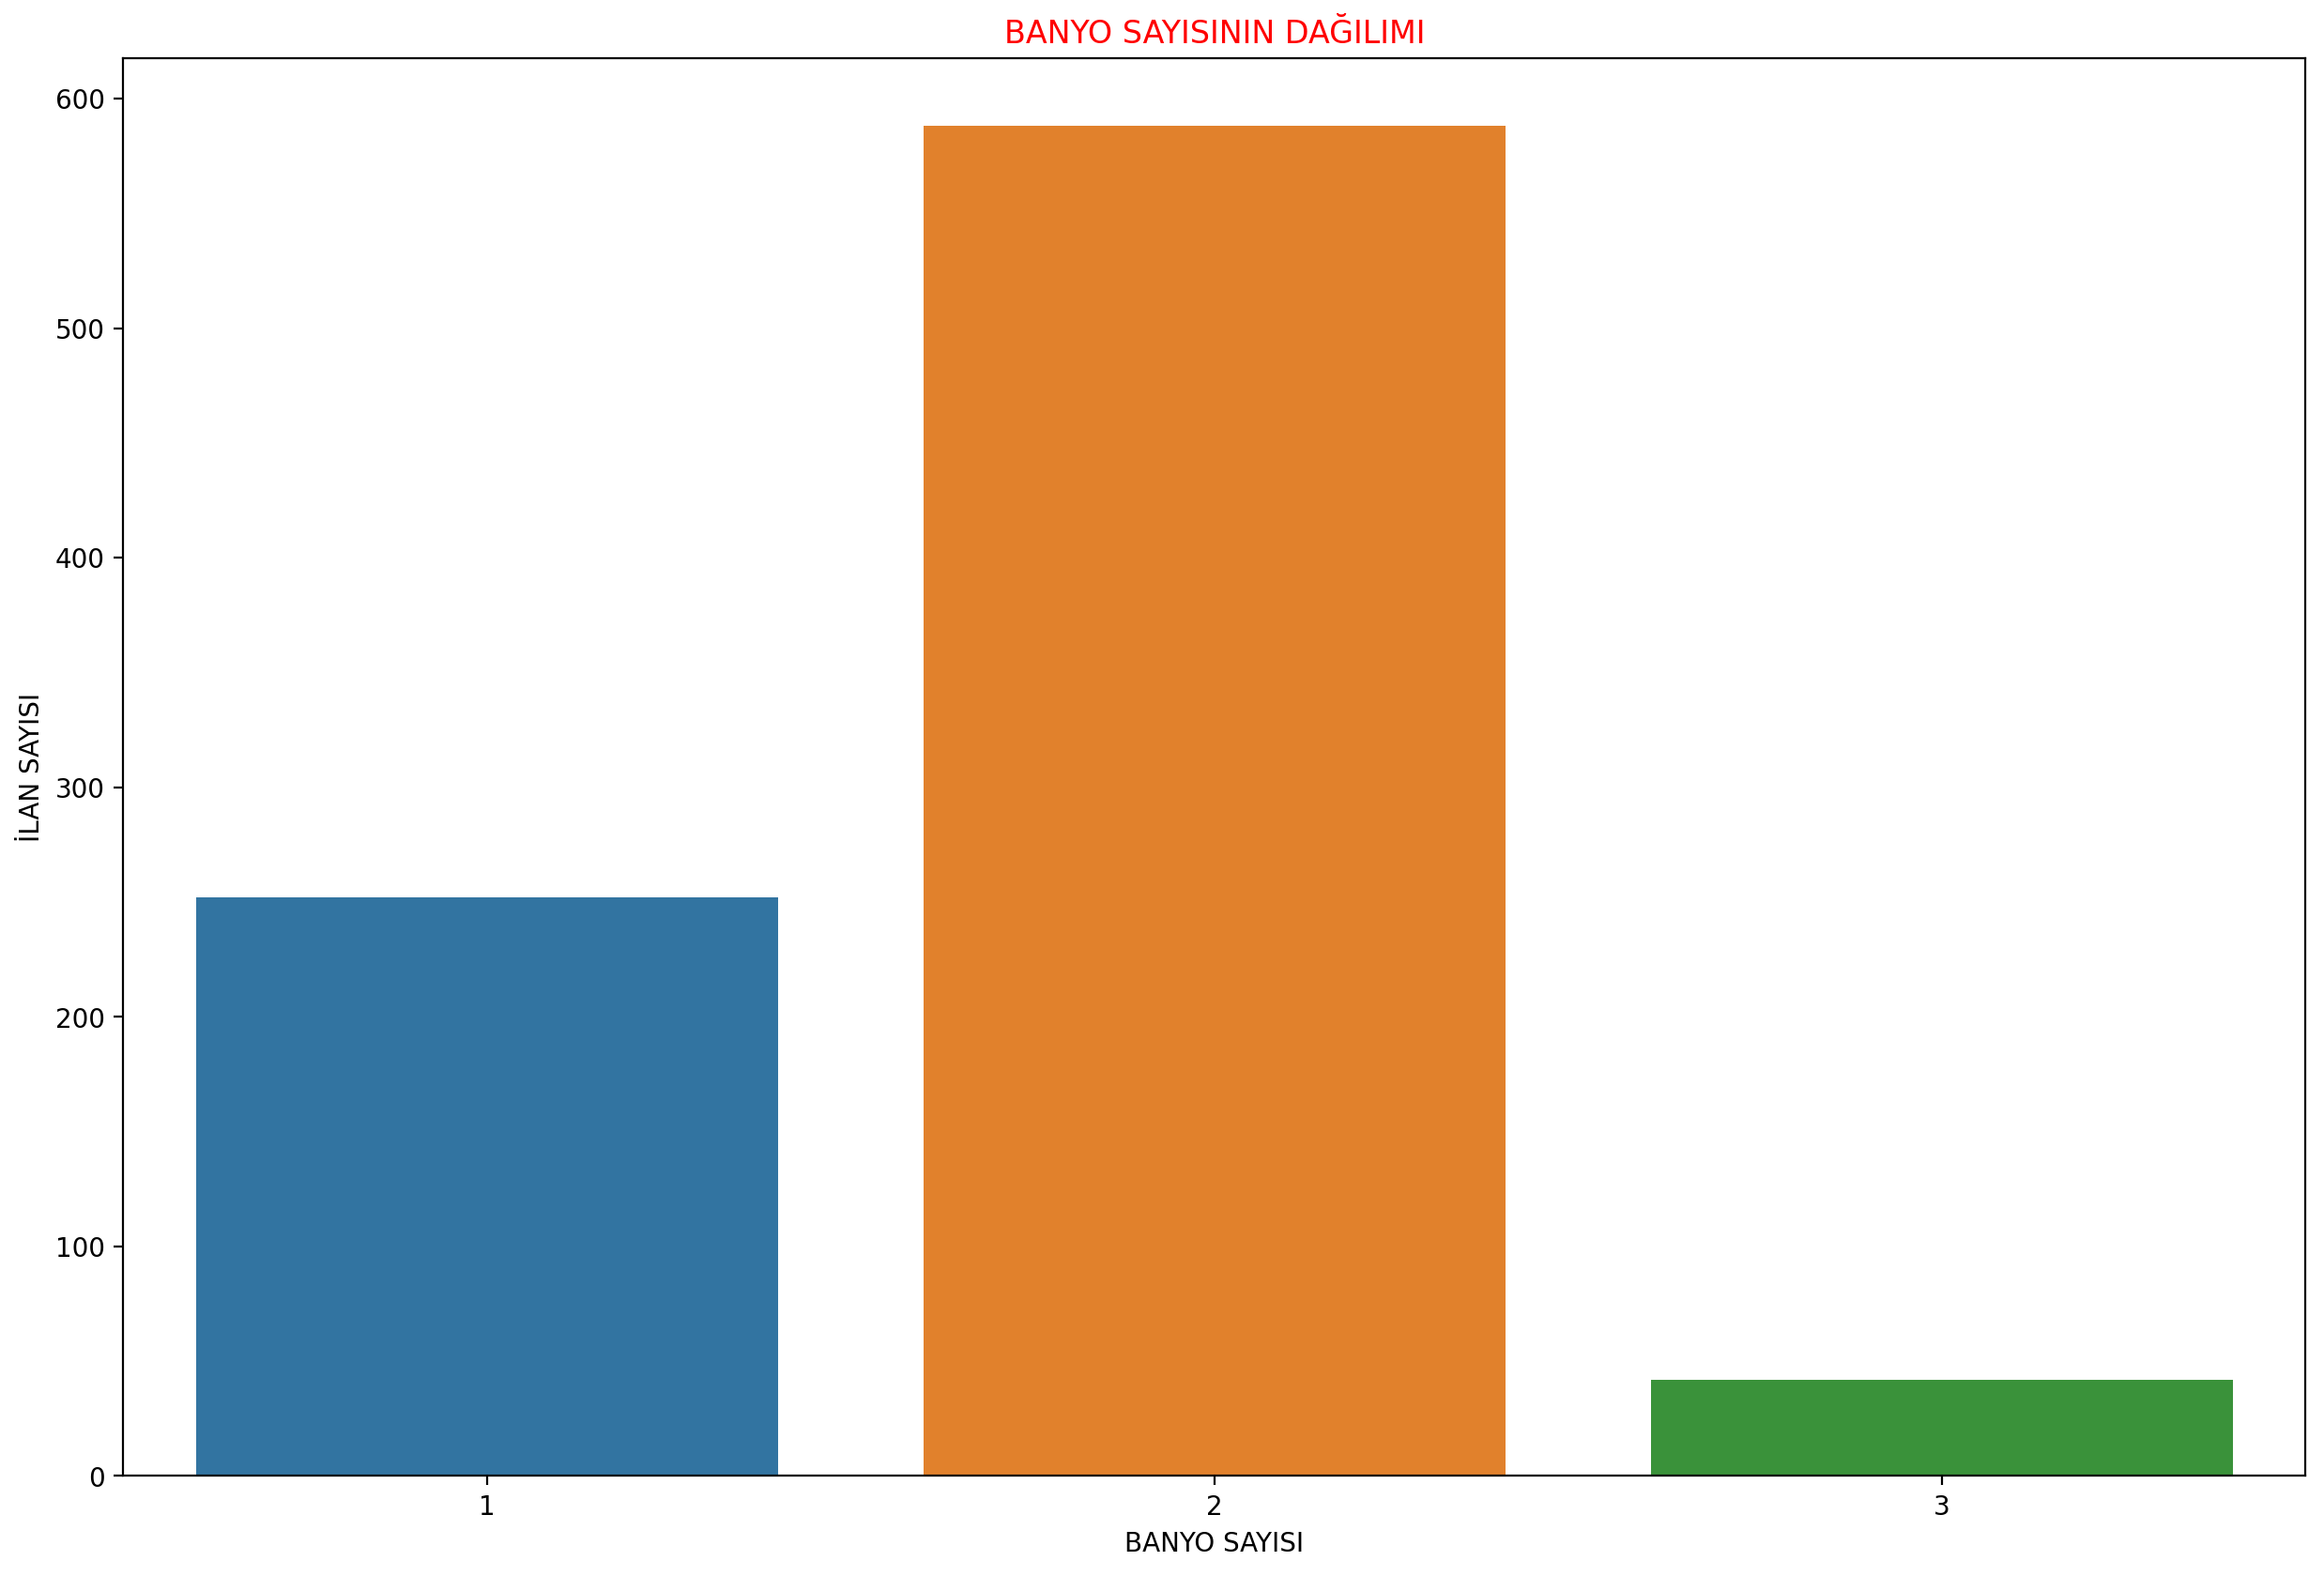

In [135]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("BANYO SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'BANYO SAYISI', y = 'İLAN ADI', data = banyo)
plt.ylabel("İLAN SAYISI")


In [136]:
mahalle = df.groupby("SEMT").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN ADI", ascending=False)
mahalle_sort

,SEMT,İLAN ADI
9,Karakaya Keçiören\n ...,168
7,Feridun Çelik Altındağ\n ...,84
0,30 Ağustos Etimesgut\n ...,42
1,Alacaatlı Çankaya\n ...,42
2,Ballıkpınar Gölbaşı\n ...,42
3,Battalgazi Altındağ\n ...,42
4,Bağcılar Çankaya\n ...,42
5,Bağlıca Etimesgut\n ...,42
6,Etlik Keçiören\n ...,42
8,Göksu Etimesgut\n ...,42


Text(0, 0.5, 'İLAN SAYISI')

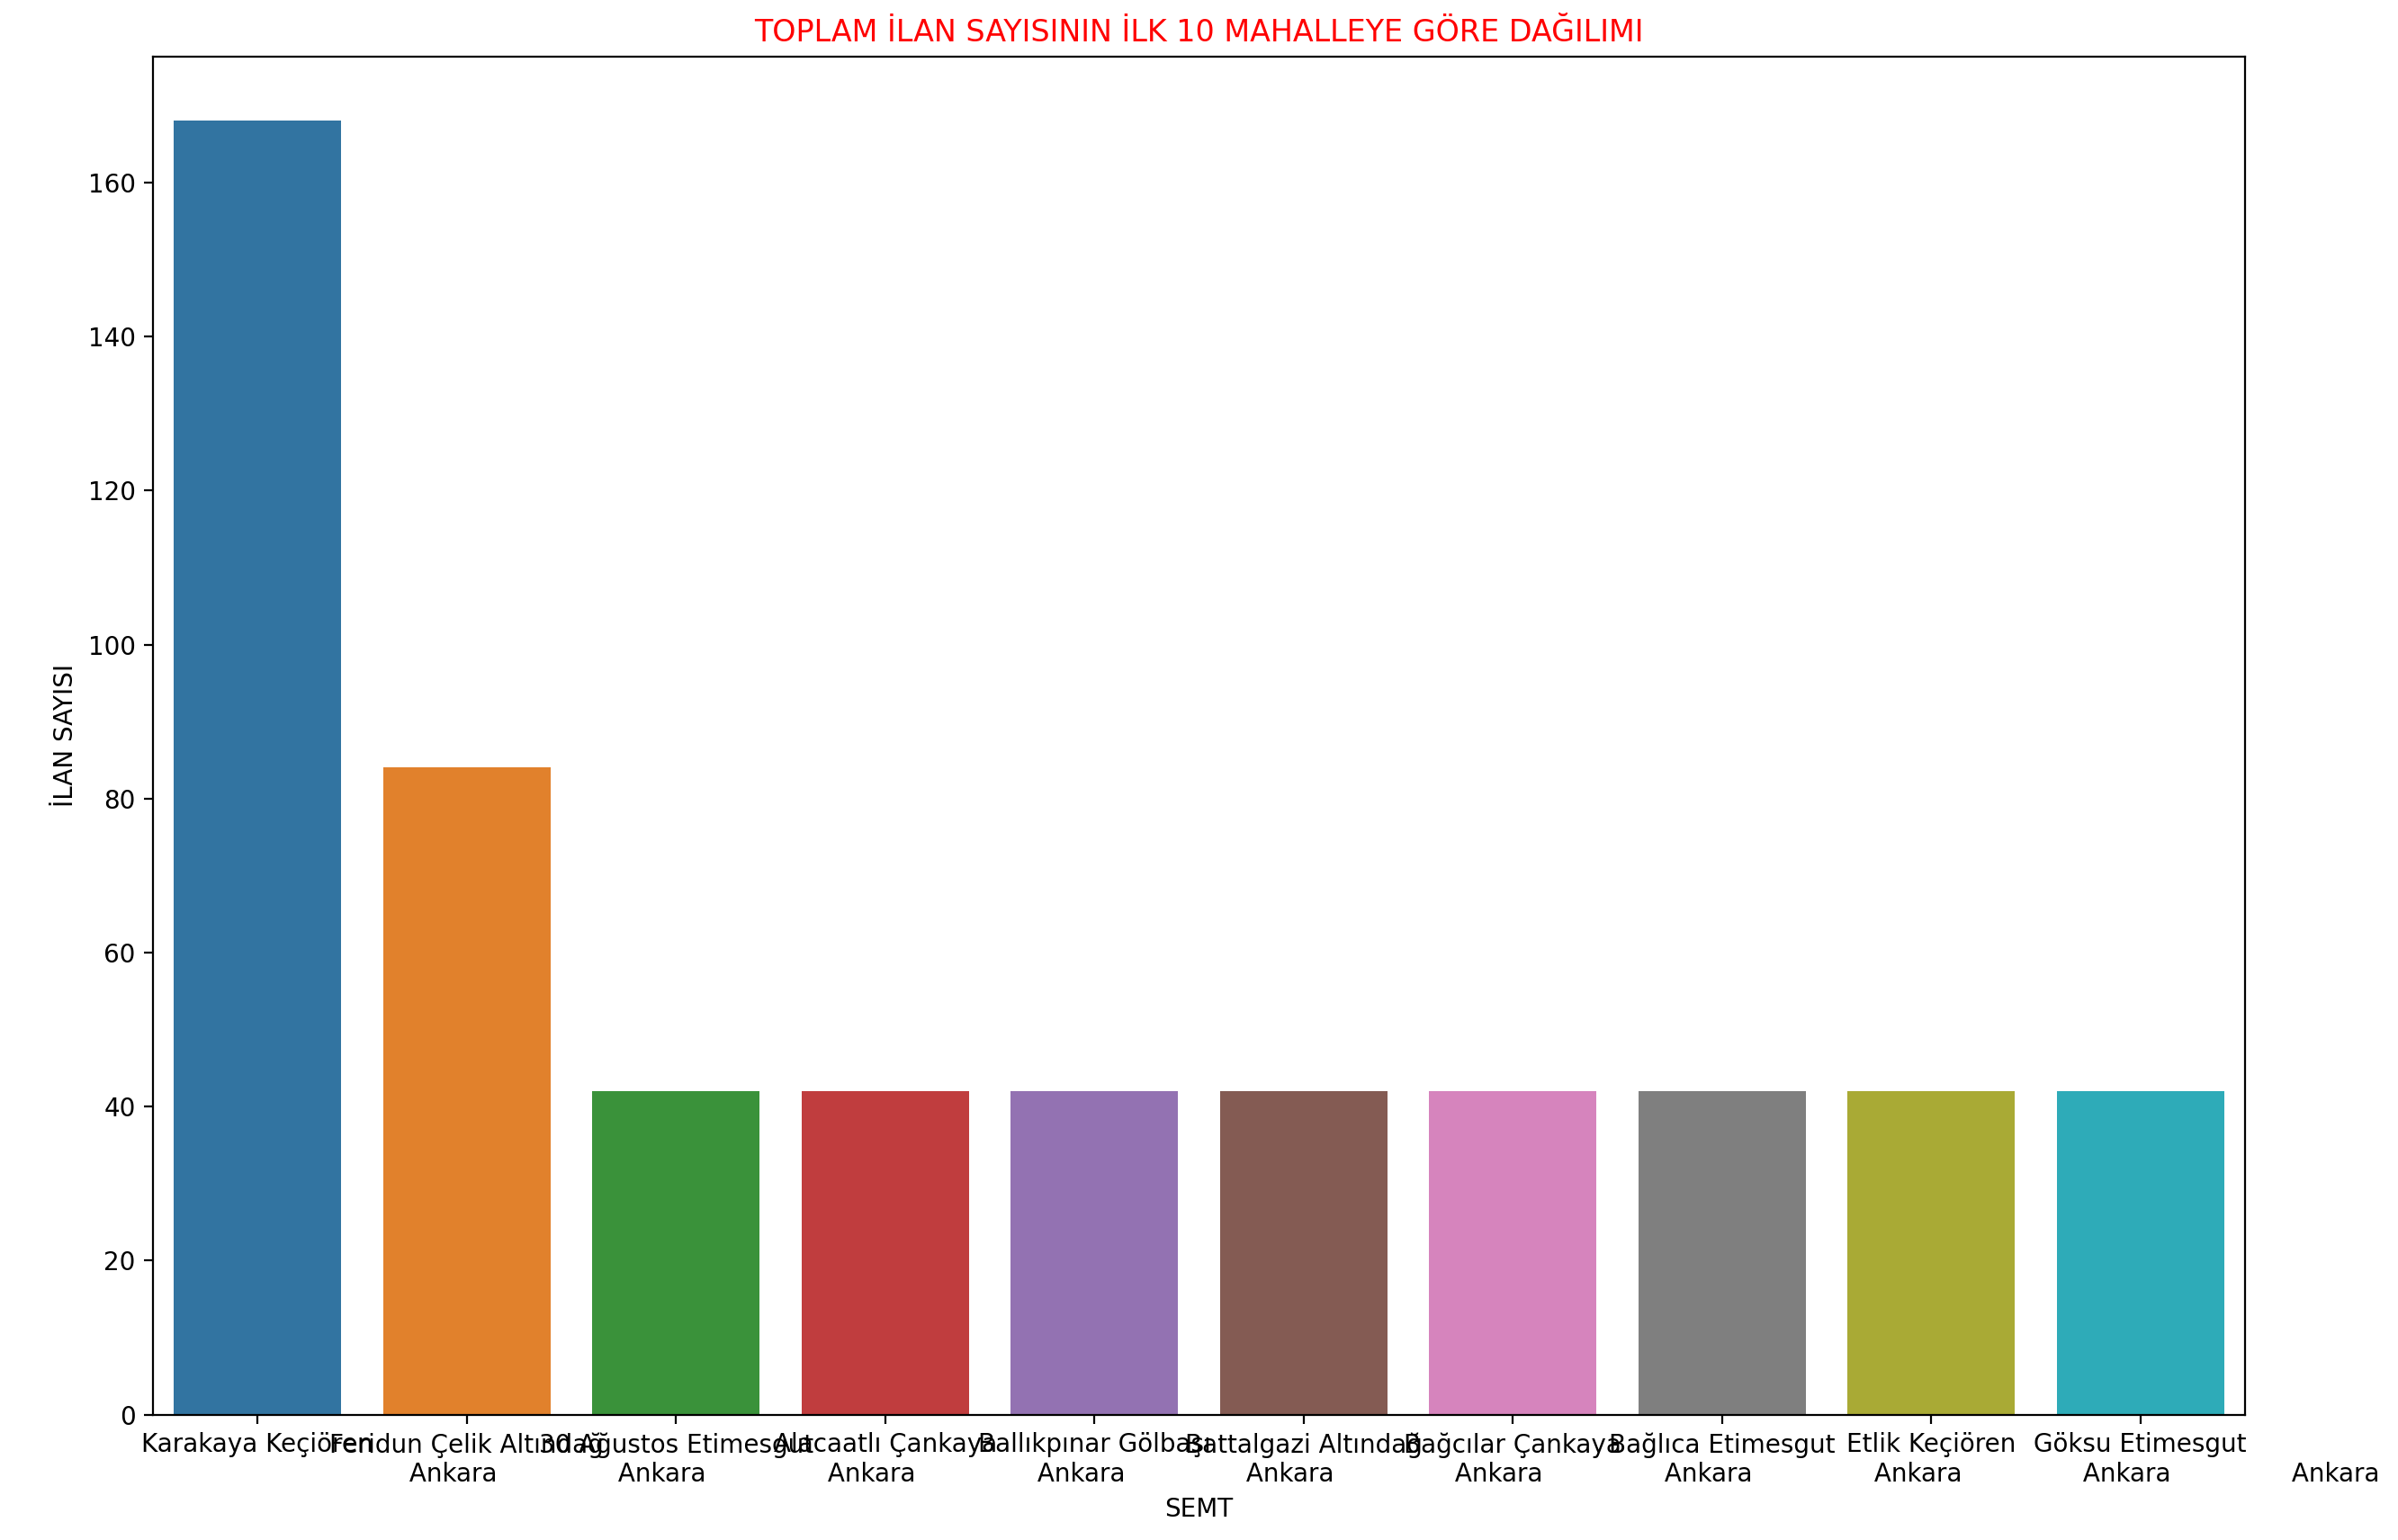

In [137]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'SEMT', y = 'İLAN ADI', data = mahalle_sort)
plt.ylabel("İLAN SAYISI")


In [138]:
new_df.corr()

,FİYAT,NET(m²),BRÜT(m²),ODA SAYISI,BANYO SAYISI,FOTOĞRAF SAYISI,SEMT_30 Ağustos Etimesgut\n Ankara,SEMT_Alacaatlı Çankaya\n Ankara,SEMT_Ballıkpınar Gölbaşı\n Ankara,SEMT_Battalgazi Altındağ\n Ankara,...,SEMT_Feridun Çelik Altındağ\n Ankara,SEMT_Göksu Etimesgut\n Ankara,SEMT_Karakaya Keçiören\n Ankara,SEMT_Mutlu Mamak\n Ankara,SEMT_Mutlukent Çankaya\n Ankara,SEMT_Ufuktepe Keçiören\n Ankara,SEMT_Yayla Keçiören\n Ankara,SEMT_Yeni Batı Yenimahalle\n Ankara,SEMT_Çiğdemtepe Yenimahalle\n Ankara,SEMT_Şehit Osman Avcı Etimesgut\n Ankara
FİYAT,1.000000,0.894504,0.930190,0.779198,0.464200,0.237940,-0.150177,0.066410,0.109017,-0.143075,...,-0.179261,0.022382,-0.256727,-0.107569,0.801382,-0.125393,-0.083425,0.059308,-0.082786,-0.132424
NET(m²),0.894504,1.000000,0.991099,0.876555,0.582886,0.290702,-0.158223,-0.131506,0.193962,-0.097502,...,-0.132660,-0.012491,-0.165407,-0.121790,0.582581,-0.048924,-0.073213,0.036086,-0.048924,-0.255378
BRÜT(m²),0.930190,0.991099,1.000000,0.861024,0.545131,0.281769,-0.151160,-0.132704,0.162584,-0.095793,...,-0.125602,-0.003515,-0.172773,-0.105021,0.679339,-0.068110,-0.086565,0.033396,-0.031199,-0.224982
ODA SAYISI,0.779198,0.876555,0.861024,1.000000,0.605379,0.343900,-0.262312,-0.262312,0.288543,-0.078693,...,-0.114180,0.104925,-0.170710,-0.078693,0.472161,-0.078693,-0.078693,0.288543,-0.078693,-0.445930
BANYO SAYISI,0.464200,0.582886,0.545131,0.605379,1.000000,0.199928,-0.323911,0.101222,0.101222,0.101222,...,0.146868,0.101222,-0.010979,-0.323911,0.101222,-0.323911,-0.323911,0.101222,0.101222,-0.323911
FOTOĞRAF SAYISI,0.237940,0.290702,0.281769,0.343900,0.199928,1.000000,0.201808,-0.309152,-0.038644,0.141695,...,-0.252318,0.322034,-0.344637,0.051525,0.021469,0.111638,-0.188926,0.291977,-0.008588,0.021469
SEMT_30 Ağustos Etimesgut\n Ankara,-0.150177,-0.158223,-0.151160,-0.262312,-0.323911,0.201808,1.000000,-0.050000,-0.050000,-0.050000,...,-0.072548,-0.050000,-0.108465,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000
SEMT_Alacaatlı Çankaya\n Ankara,0.066410,-0.131506,-0.132704,-0.262312,0.101222,-0.309152,-0.050000,1.000000,-0.050000,-0.050000,...,-0.072548,-0.050000,-0.108465,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000
SEMT_Ballıkpınar Gölbaşı\n Ankara,0.109017,0.193962,0.162584,0.288543,0.101222,-0.038644,-0.050000,-0.050000,1.000000,-0.050000,...,-0.072548,-0.050000,-0.108465,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000
SEMT_Battalgazi Altındağ\n Ankara,-0.143075,-0.097502,-0.095793,-0.078693,0.101222,0.141695,-0.050000,-0.050000,-0.050000,1.000000,...,-0.072548,-0.050000,-0.108465,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000,-0.050000


<AxesSubplot:title={'center':'EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ'}>

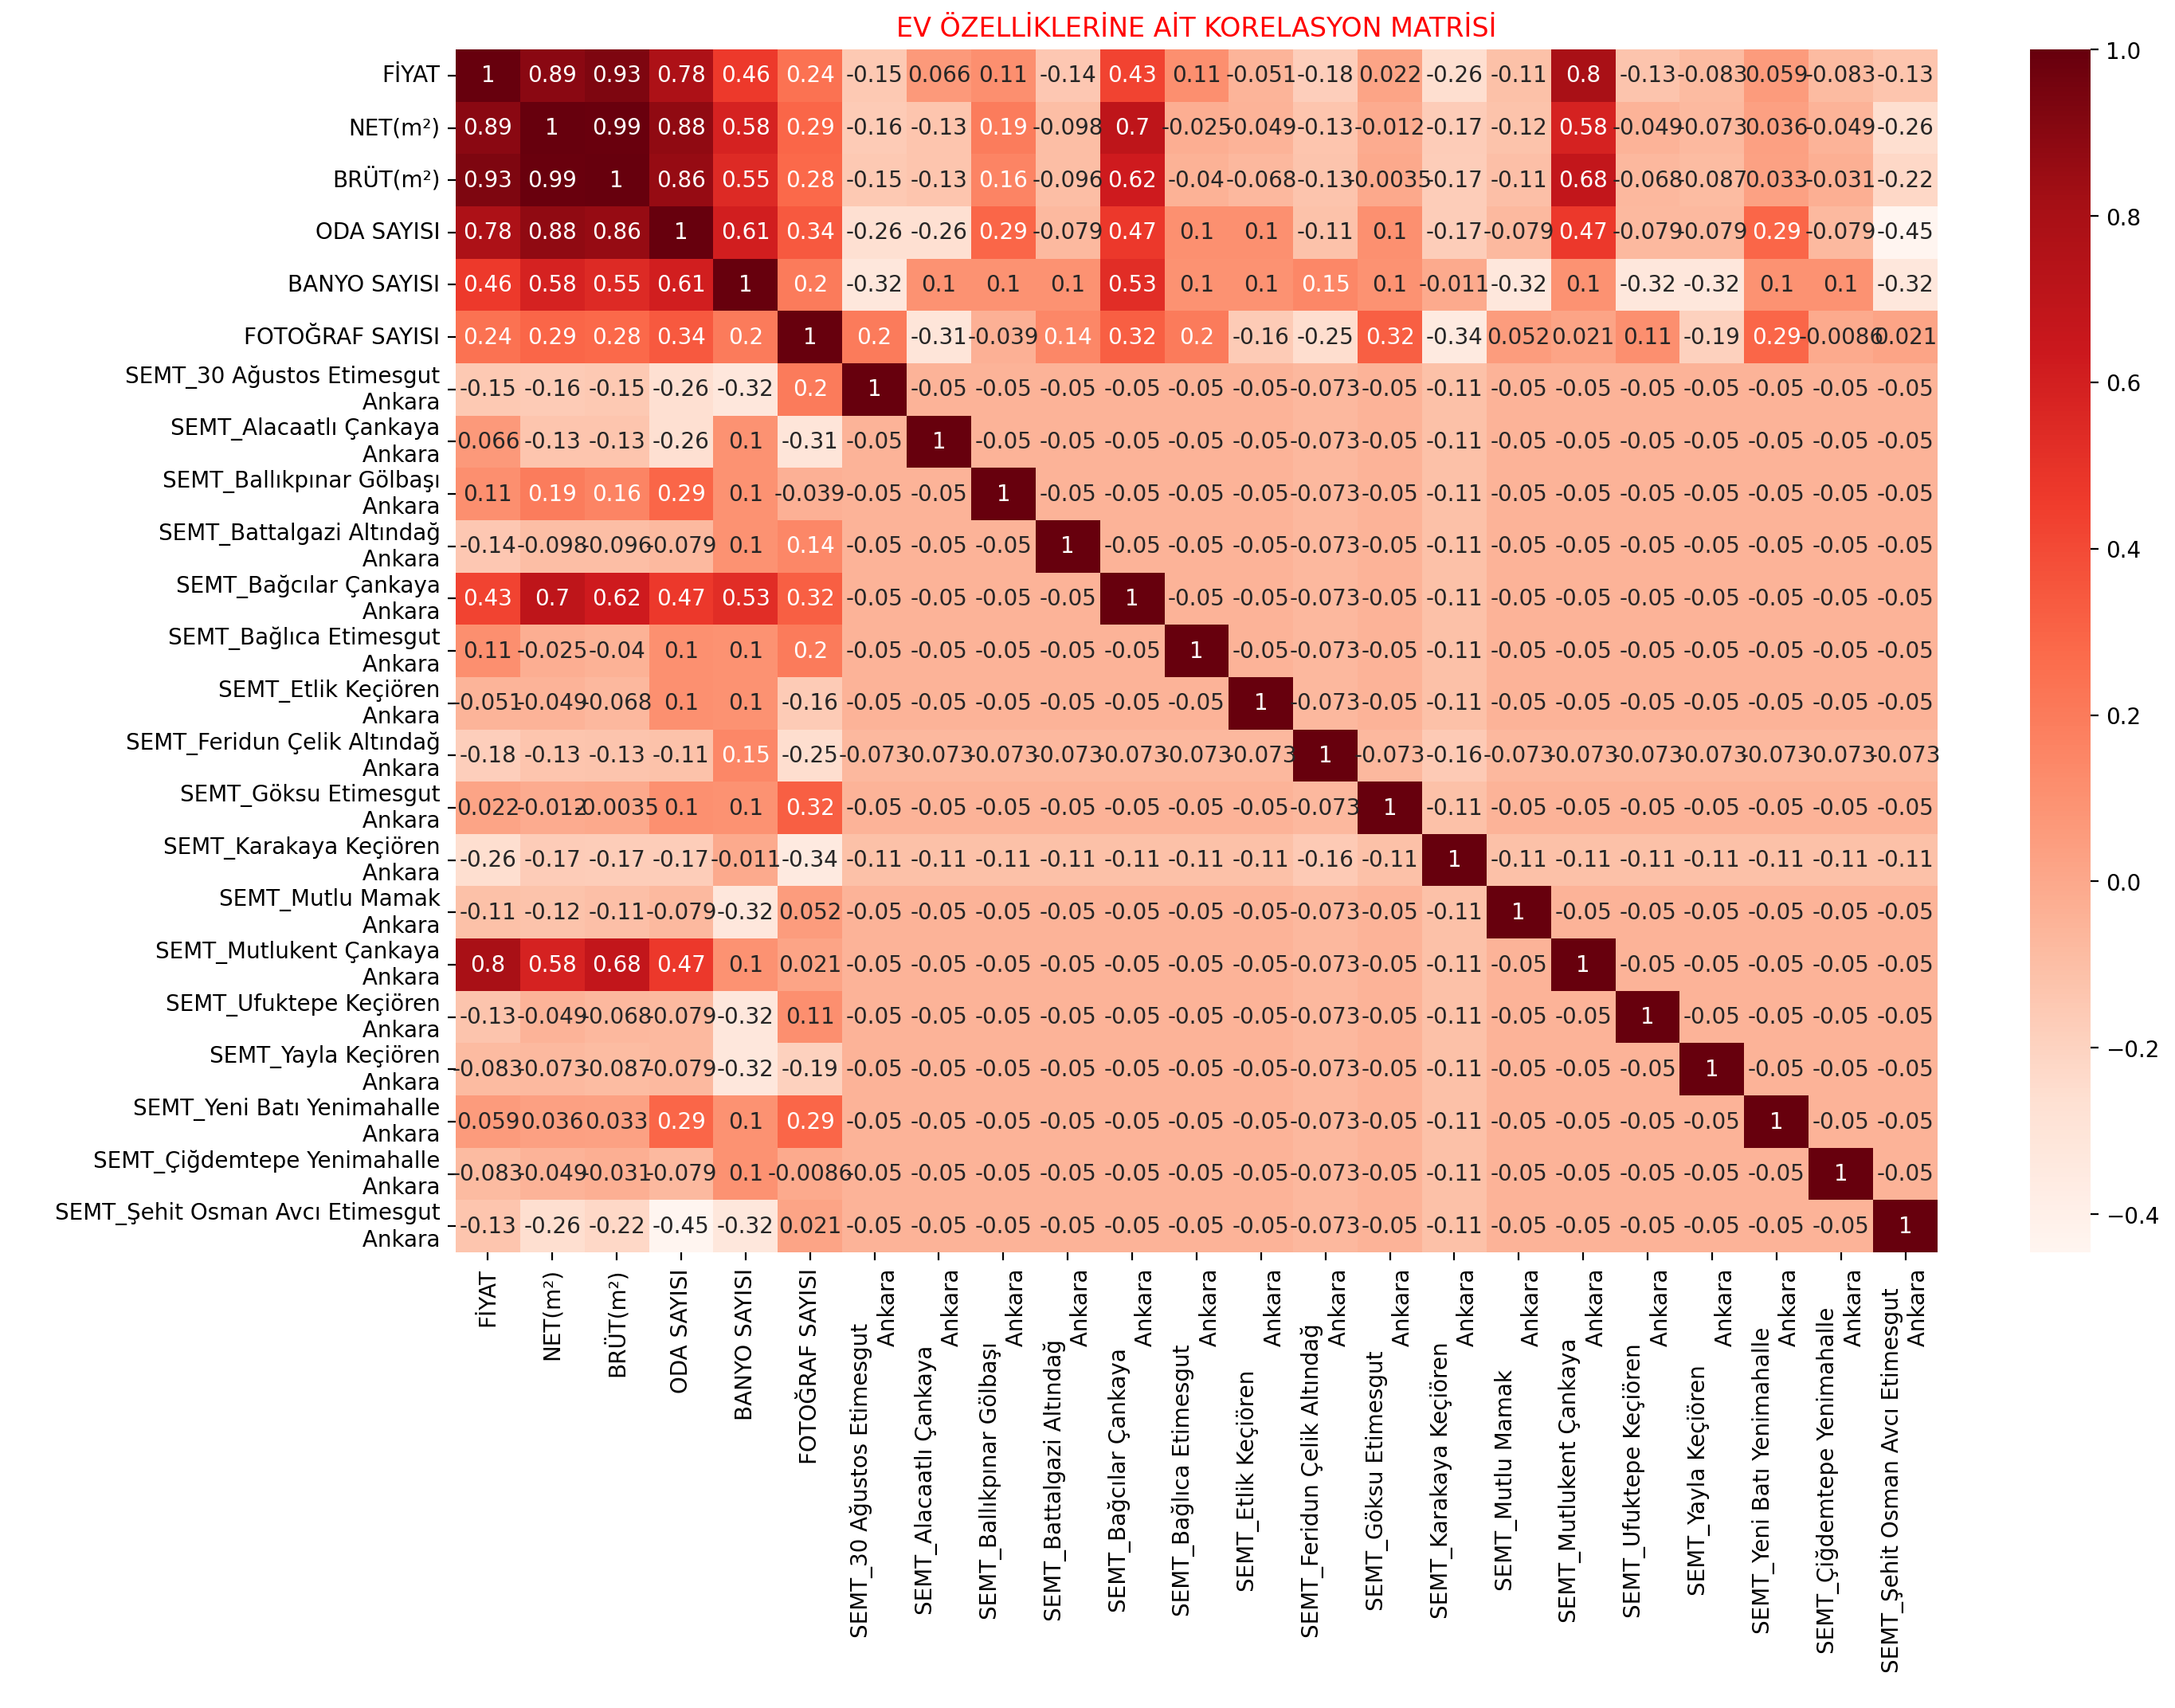

In [139]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(new_df.corr(), cmap="Reds", annot=True)


In [143]:
other_df = new_df.drop(columns=["İLAN ADI", "NET(m²)","BRÜT(m²)","ODA SAYISI","SALON SAYISI","BANYO SAYISI","FOTOĞRAF SAYISI"])
other_df

,FİYAT,SEMT_30 Ağustos Etimesgut\n Ankara,SEMT_Alacaatlı Çankaya\n Ankara,SEMT_Ballıkpınar Gölbaşı\n Ankara,SEMT_Battalgazi Altındağ\n Ankara,SEMT_Bağcılar Çankaya\n Ankara,SEMT_Bağlıca Etimesgut\n Ankara,SEMT_Etlik Keçiören\n Ankara,SEMT_Feridun Çelik Altındağ\n Ankara,SEMT_Göksu Etimesgut\n Ankara,SEMT_Karakaya Keçiören\n Ankara,SEMT_Mutlu Mamak\n Ankara,SEMT_Mutlukent Çankaya\n Ankara,SEMT_Ufuktepe Keçiören\n Ankara,SEMT_Yayla Keçiören\n Ankara,SEMT_Yeni Batı Yenimahalle\n Ankara,SEMT_Çiğdemtepe Yenimahalle\n Ankara,SEMT_Şehit Osman Avcı Etimesgut\n Ankara
0,988000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1290000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3280000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1450000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1790000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,1100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
878,950000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
879,14250000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
880,1199000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:title={'center':'EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ'}>

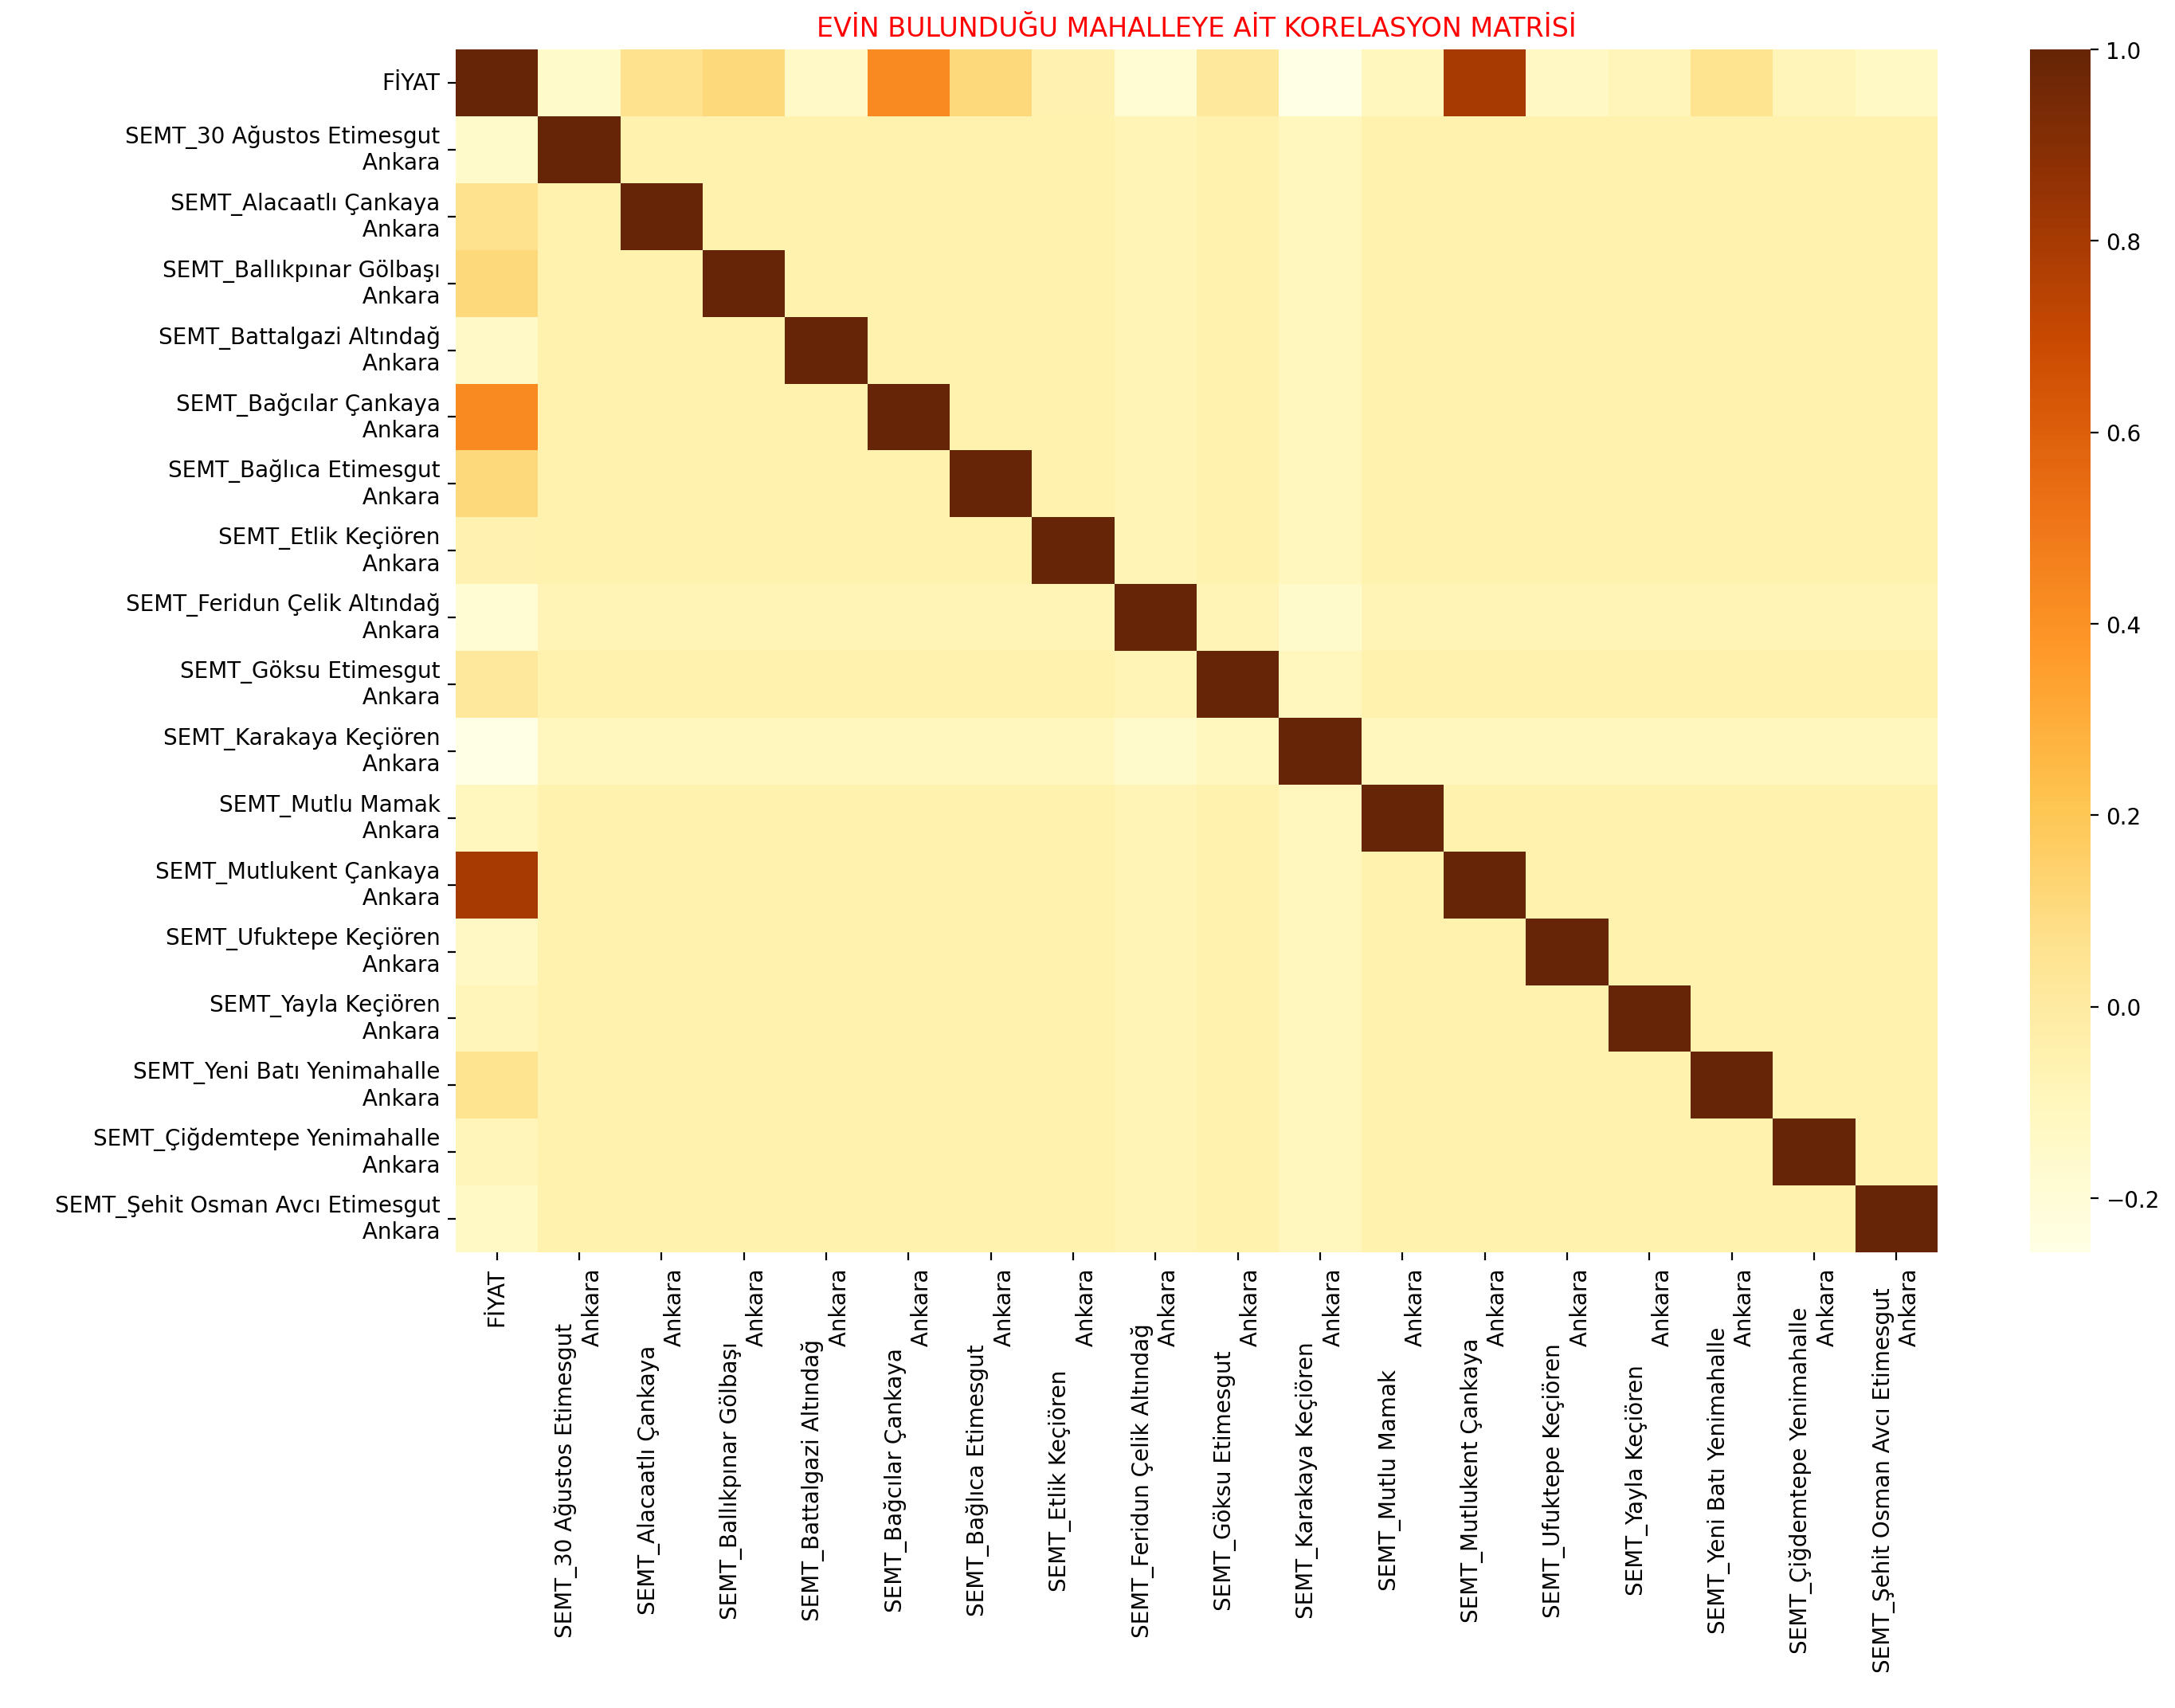

In [144]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(other_df.corr(), cmap="YlOrBr")

In [145]:
X = new_df.iloc[:,1:]
Y = new_df.iloc[:,:1]


In [160]:
X = X.values.astype(np.float)
Y = Y.values.astype(np.float)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

In [163]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [154]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [156]:
def _assert_all_finite(X):
    """Like assert_all_finite, but only for ndarray."""
    X = np.asanyarray(X)
    # First try an O(n) time, O(1) space solution for the common case that
    # everything is finite; fall back to O(n) space np.isfinite to prevent
    # false positives from overflow in sum method.
    if (X.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(X.sum())
            and not np.isfinite(X).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % X.dtype)

In [158]:
print(p[:,0].shape)
index = 0
for i in p[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

NameError: name 'p' is not defined

In [157]:
lr_model = LinearRegression()

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [164]:
print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

NameError: name 'pred' is not defined

In [165]:
x = new_df.loc[:,["NET(m²)", "BRÜT(m²)", "ODA SAYISI", "SALON SAYISI"]]
y = new_df.iloc[:,:1]

In [167]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
new_pred = lr_model.predict(X_val)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [168]:
print("MSE Value: ", np.mean((new_pred - Y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(X_test, Y_test), "\n")
S
print("R^2 Score Value (Validation): ", lr_model.score(X_val, Y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

NameError: name 'new_pred' is not defined

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_test_scaled = scaler.fit_transform(x_test.values)
x_val_scaled = scaler.fit_transform(x_val.values)

lr_model_ridge = Ridge(alpha=0.05, normalize=True)

lr_model_ridge.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_ridge.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_ridge.score(x_val_scaled, y_val))

In [ ]:
lr_model_lasso = Lasso(alpha=0.05, normalize=True)

lr_model_lasso.fit(x_train_scaled, y_train)

print("R^2 Score Value (Test): ", lr_model_lasso.score(x_test_scaled, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model_lasso.score(x_val_scaled, y_val))